### ***1️⃣ Import Libraries***

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [69]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [70]:
import cv2
import random
import os
from PIL import Image
from tqdm import tqdm
import shutil

In [71]:
# Ignore all warnings
warnings.filterwarnings("ignore")

### ***2️⃣ Directories***

In [176]:
# Define paths
base_dir = "data"
raw_uppercase_dir = os.path.join(base_dir, "raw/UPPER_CASE")
raw_lowercase_dir = os.path.join(base_dir, "raw/lower_case")

balance_uppercase_dir = os.path.join(base_dir, "balance/UPPER_CASE")
balance_lowercase_dir = os.path.join(base_dir, "balance/lower_case")

aug_uppercase_dir = os.path.join(base_dir, "augmentation/UPPER_CASE")
aug_lowercase_dir = os.path.join(base_dir, "augmentation/lower_case")

split_dir = os.path.join(base_dir, "split")

split_train_dir = os.path.join(split_dir, "train")
split_test_dir = os.path.join(split_dir, "test")
split_val_dir = os.path.join(split_dir, "val")

In [178]:
# Create balance directories if they don't exist
os.makedirs(balance_uppercase_dir, exist_ok=True)
os.makedirs(balance_lowercase_dir, exist_ok=True)

os.makedirs(aug_uppercase_dir, exist_ok=True)
os.makedirs(aug_lowercase_dir, exist_ok=True)

os.makedirs(split_uppercase_dir, exist_ok=True)
os.makedirs(split_lowercase_dir, exist_ok=True)

os.makedirs(split_train_dir, exist_ok=True)
os.makedirs(split_test_dir, exist_ok=True)
os.makedirs(split_val_dir, exist_ok=True)

### ***3️⃣ Image Loading***

In [76]:
# Initialize lists to store images and labels
uppercase_images = []
uppercase_labels = []
lowercase_images = []
lowercase_labels = []

In [77]:
# Load uppercase images
for folder in os.listdir(raw_uppercase_dir):
    folder_path = os.path.join(raw_uppercase_dir, folder)
    if os.path.isdir(folder_path):
        for filename in tqdm(os.listdir(folder_path), desc=f"Loading {folder}...."):
            if filename.endswith(".png"):
                img_path = os.path.join(folder_path, filename)
                try:
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    uppercase_images.append(img_array)
                    uppercase_labels.append(folder)
                except Exception as e:
                    print(f"Error loading image: {img_path}, Error: {e}")

Loading Z....: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 154.08it/s]


In [78]:
# Load lowercase images
for folder in os.listdir(raw_lowercase_dir):
    folder_path = os.path.join(raw_lowercase_dir, folder)
    if os.path.isdir(folder_path):
        for filename in tqdm(os.listdir(folder_path), desc=f"Loading {folder}...."):
            if filename.endswith(".png"):
                img_path = os.path.join(folder_path, filename)
                try:
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    lowercase_images.append(img_array)
                    lowercase_labels.append(folder)
                except Exception as e:
                    print(f"Error loading image: {img_path}, Error: {e}")

Loading z....: 100%|████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 118.11it/s]


In [79]:
# Get image shapes and lengths
uppercase_image_shape = uppercase_images[0].shape
lowercase_image_shape = lowercase_images[0].shape
uppercase_image_count = len(uppercase_images)
lowercase_image_count = len(lowercase_images)

In [80]:
print(f"Uppercase Image Shape: {uppercase_image_shape}")
print(f"Lowercase Image Shape: {lowercase_image_shape}")
print(f"Number of Uppercase Images: {uppercase_image_count}")
print(f"Number of Lowercase Images: {lowercase_image_count}")

Uppercase Image Shape: (525, 483, 4)
Lowercase Image Shape: (525, 483, 4)
Number of Uppercase Images: 2600
Number of Lowercase Images: 2700


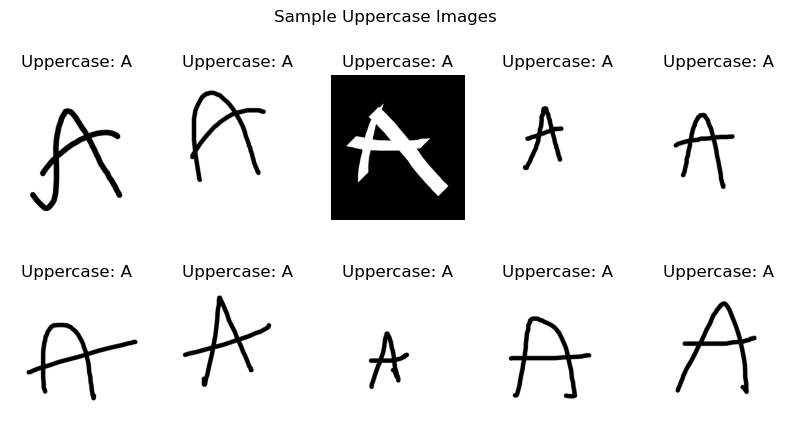

In [81]:
# Display sample uppercase images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(uppercase_images[i])
    plt.title(f"Uppercase: {uppercase_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Uppercase Images")
plt.show()

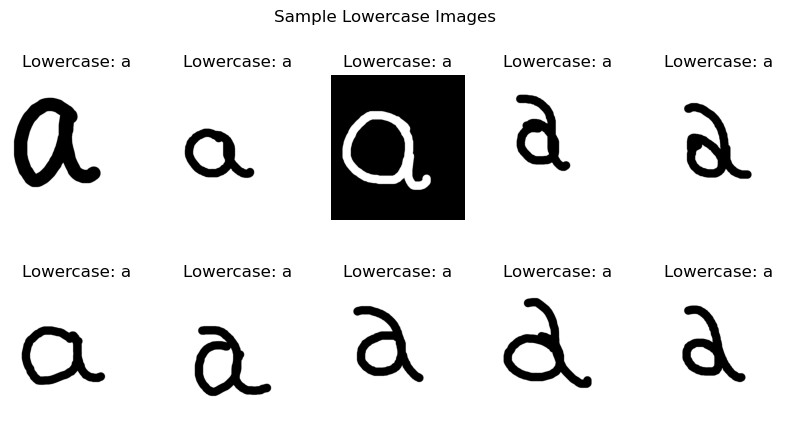

In [82]:
# Display sample lowercase images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(lowercase_images[i])
    plt.title(f"Lowercase: {lowercase_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Lowercase Images")
plt.show()

In [83]:
# Combine images and labels
all_images = uppercase_images + lowercase_images
all_labels = uppercase_labels + lowercase_labels

# Get unique labels and their counts
unique_labels, label_counts = np.unique(all_labels, return_counts=True)

In [84]:
lower_labels, lower_label_count = np.unique(lowercase_labels, return_counts=True)

# Create a DataFrame to store label counts
lower_label_counts = pd.DataFrame({'Label': lower_labels, 'Count': lower_label_count})

# Sort the DataFrame by Label (A-Z, a-z)
lower_label_counts = lower_label_counts.sort_values(by='Label')

print("Lower Label Counts:")
display(lower_label_counts)

Lower Label Counts:


Label  Count
0      a    100
1      b    100
2      c    100
3      d    100
4      e    100
5      f    100
6      g    100
7      h    100
8      i    100
9      j    100
10     k    100
11     l    100
12     m    100
13     n    100
14     o    100
15     p    100
16     q    100
17     r    200
18     s    100
19     t    100
20     u    100
21     v    100
22     w    100
23     x    100
24     y    100
25     z    100

In [85]:
upper_labels, upper_label_count = np.unique(uppercase_labels, return_counts=True)

# Create a DataFrame to store label counts
upper_label_counts = pd.DataFrame({'Label': upper_labels, 'Count': upper_label_count})

# Sort the DataFrame by Label (A-Z, a-z)
upper_label_counts = upper_label_counts.sort_values(by='Label')

print("Upper Label Counts:")
display(upper_label_counts)

Upper Label Counts:


Label  Count
0      A    100
1      B    100
2      C    100
3      D    100
4      E    100
5      F    100
6      G    100
7      H    100
8      I    100
9      J    100
10     K    100
11     L    100
12     M    100
13     N    100
14     O    100
15     P    100
16     Q    100
17     R    100
18     S    100
19     T    100
20     U    100
21     V    100
22     W    100
23     X    100
24     Y    100
25     Z    100

In [86]:
# Create a DataFrame to store label counts
label_counts_df = pd.DataFrame({'Label': unique_labels, 'Count': label_counts})

# Sort the DataFrame by Label (A-Z, a-z)
label_counts_df = label_counts_df.sort_values(by='Label')

print("Label Counts:")
display(label_counts_df)

Label Counts:


Label  Count
0      A    100
1      B    100
2      C    100
3      D    100
4      E    100
5      F    100
6      G    100
7      H    100
8      I    100
9      J    100
10     K    100
11     L    100
12     M    100
13     N    100
14     O    100
15     P    100
16     Q    100
17     R    100
18     S    100
19     T    100
20     U    100
21     V    100
22     W    100
23     X    100
24     Y    100
25     Z    100
26     a    100
27     b    100
28     c    100
29     d    100
30     e    100
31     f    100
32     g    100
33     h    100
34     i    100
35     j    100
36     k    100
37     l    100
38     m    100
39     n    100
40     o    100
41     p    100
42     q    100
43     r    200
44     s    100
45     t    100
46     u    100
47     v    100
48     w    100
49     x    100
50     y    100
51     z    100

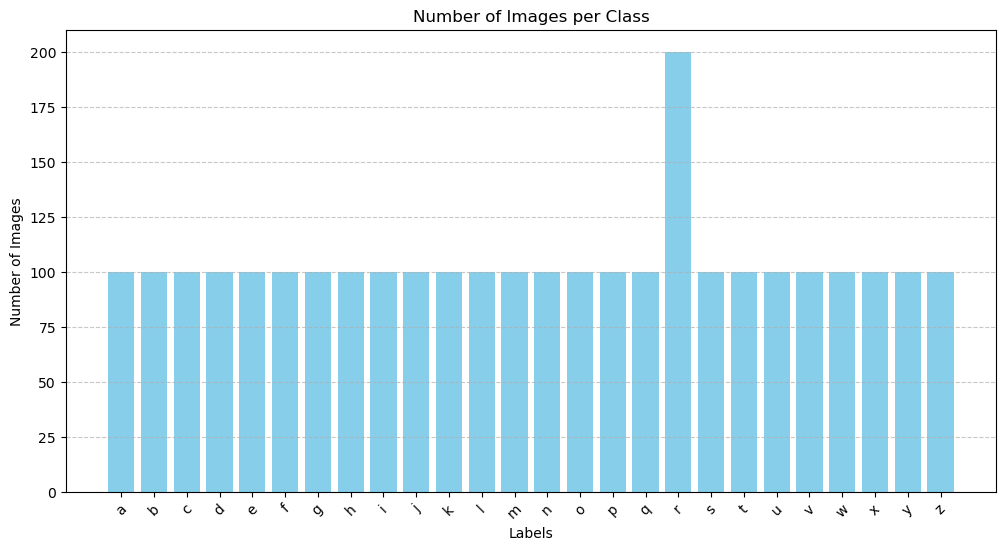

In [87]:
# Visualize the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(lower_label_counts['Label'], lower_label_counts['Count'], color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

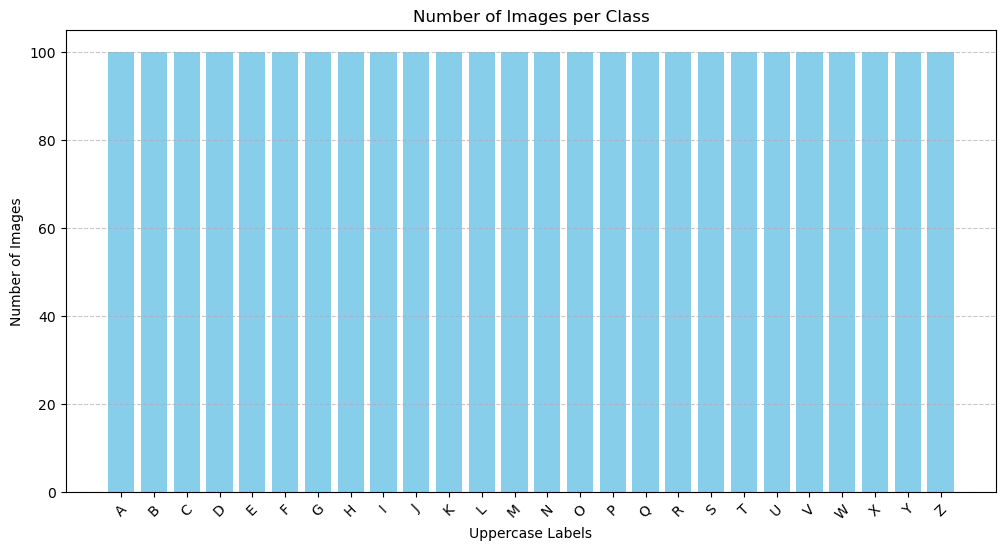

In [88]:
# Visualize the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(upper_label_counts['Label'], upper_label_counts['Count'], color='skyblue')
plt.xlabel("Uppercase Labels")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

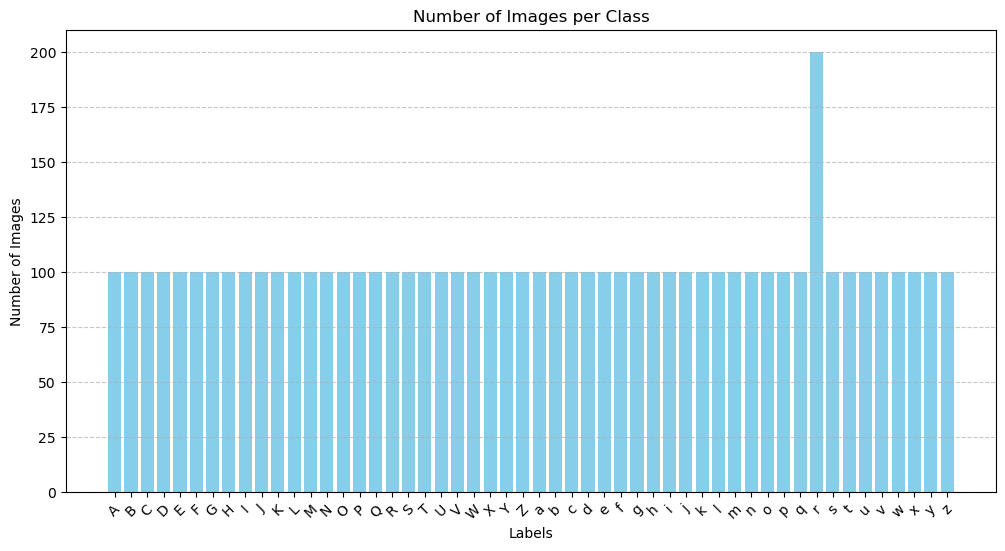

In [89]:
# Visualize the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(label_counts_df['Label'], label_counts_df['Count'], color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

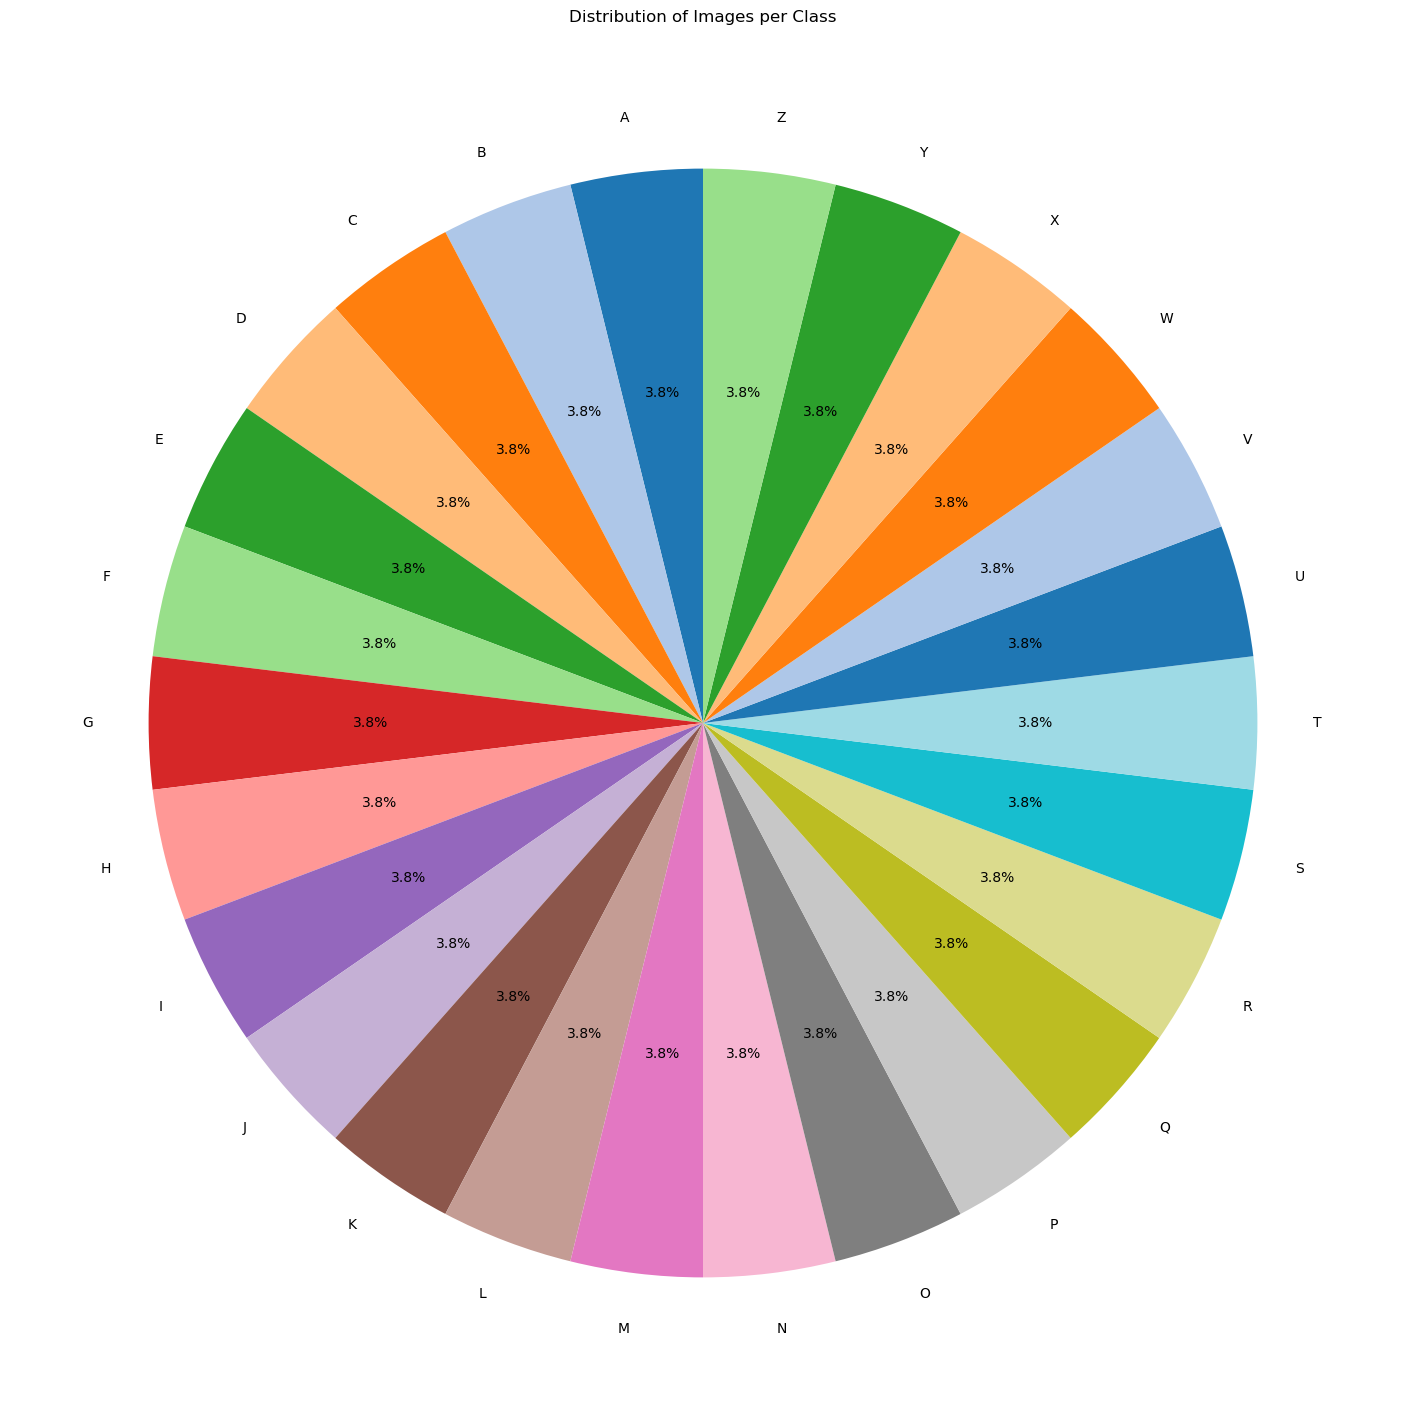

In [90]:
# Pie chart for distribution of images per class
plt.figure(figsize=(18, 18))
plt.pie(upper_label_count, labels=upper_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribution of Images per Class")
plt.show()

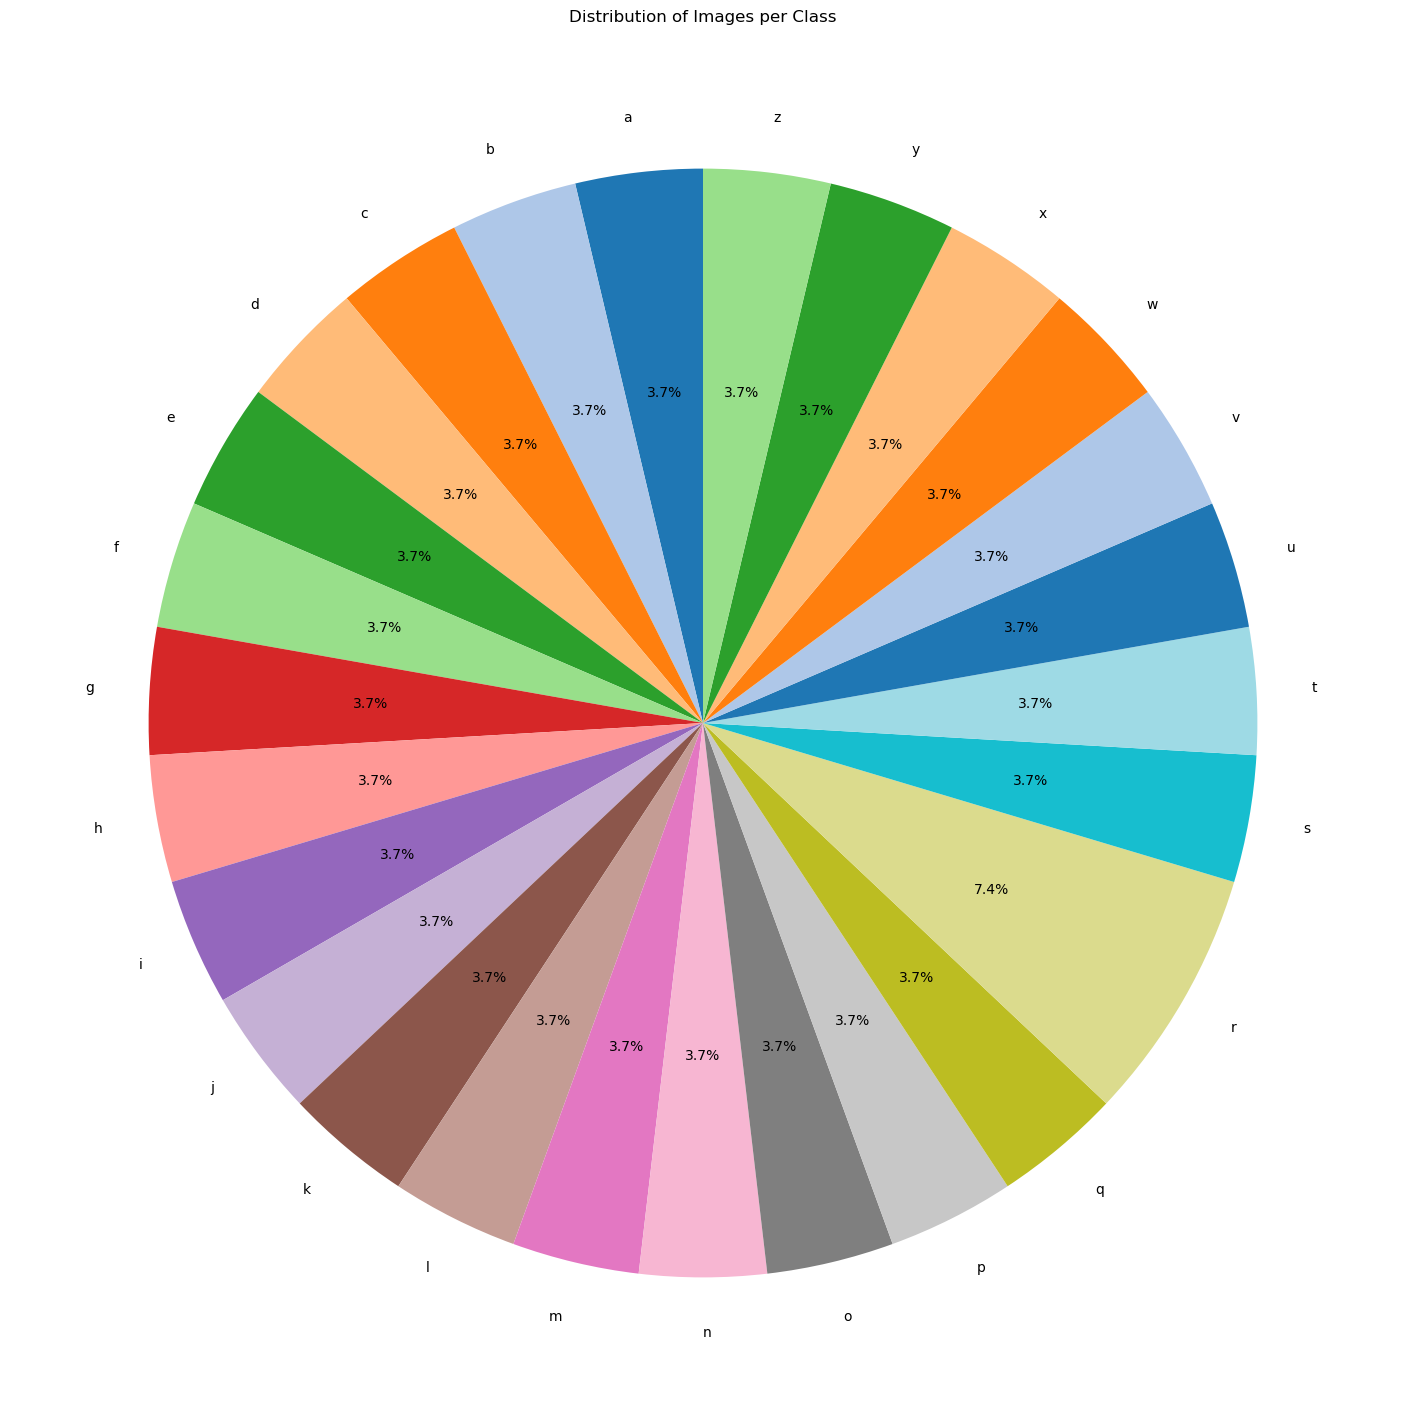

In [91]:
# Pie chart for distribution of images per class
plt.figure(figsize=(18, 18))
plt.pie(lower_label_count, labels=lower_labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title("Distribution of Images per Class")
plt.show()

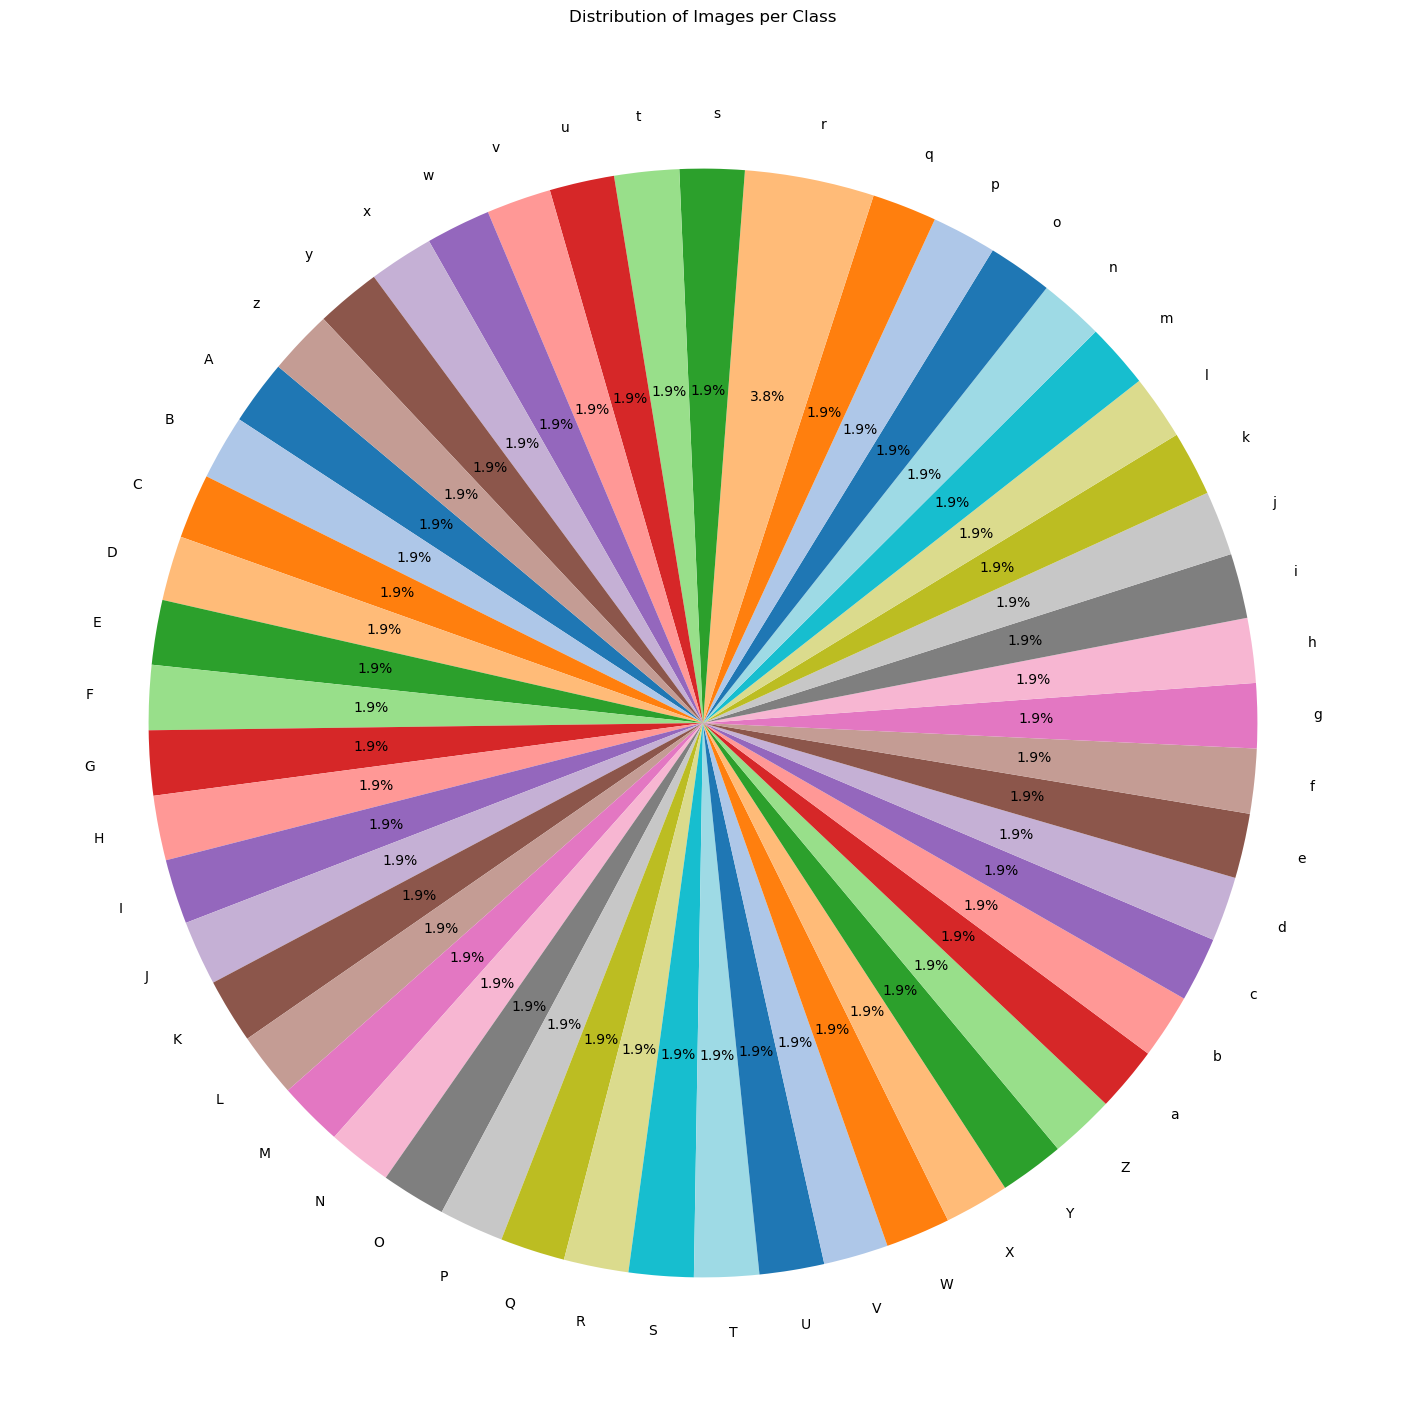

In [92]:
# Pie chart for distribution of images per class
plt.figure(figsize=(18, 18))
plt.pie(label_counts, labels=unique_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Images per Class")
plt.show()

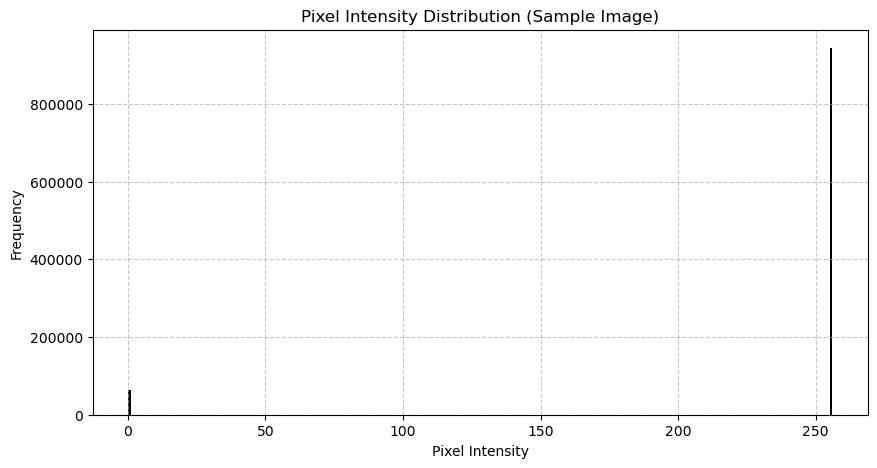

In [93]:
# Histogram of pixel intensities for a sample uppercase image
sample_image = all_images[0]
plt.figure(figsize=(10, 5))
plt.hist(sample_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Pixel Intensity Distribution (Sample Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

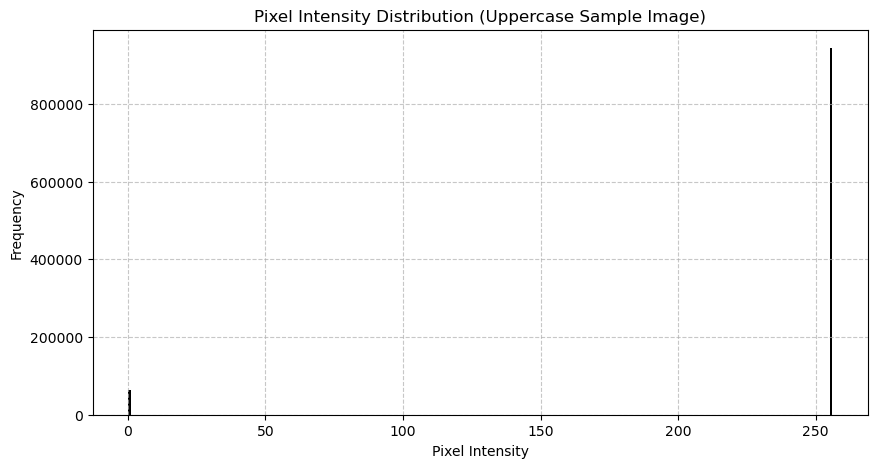

In [94]:
# Histogram of pixel intensities for a sample uppercase image
sample_uppercase_image = uppercase_images[0]
plt.figure(figsize=(10, 5))
plt.hist(sample_uppercase_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Pixel Intensity Distribution (Uppercase Sample Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

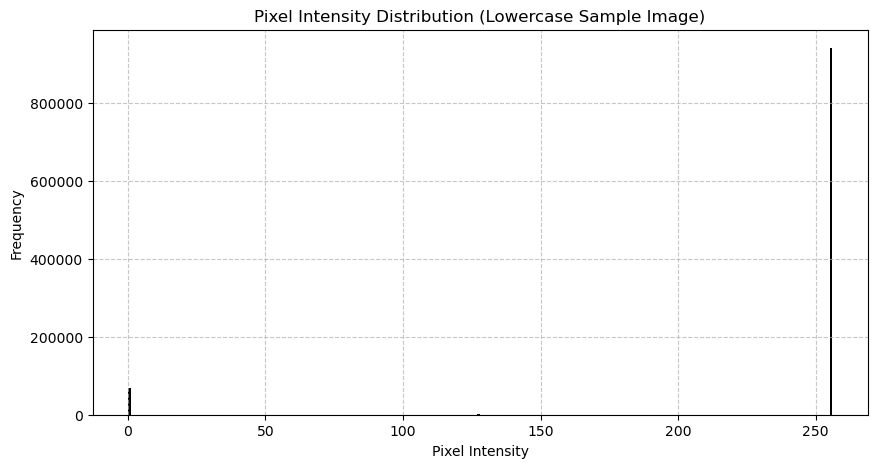

In [95]:
# Histogram of pixel intensities for a sample lowercase image
sample_lowercase_image = lowercase_images[4]
plt.figure(figsize=(10, 5))
plt.hist(sample_lowercase_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Pixel Intensity Distribution (Lowercase Sample Image)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

In [96]:
# Function to compute and plot mean and standard deviation of pixel intensities
def plot_pixel_statistics(images, labels, title):
    """
    Computes and plots the mean and standard deviation of pixel intensities for each label.
    """
    unique_labels = np.unique(labels)
    label_means = {label: [] for label in unique_labels}
    label_stds = {label: [] for label in unique_labels}

    for img, label in zip(images, labels):
        label_means[label].append(np.mean(img))
        label_stds[label].append(np.std(img))

    # Compute average mean and std for each label
    avg_means = {label: np.mean(label_means[label]) for label in unique_labels}
    avg_stds = {label: np.mean(label_stds[label]) for label in unique_labels}

    plt.figure(figsize=(12, 6))
    plt.bar(avg_means.keys(), avg_means.values(), color='blue', alpha=0.7, label='Mean')
    plt.bar(avg_stds.keys(), avg_stds.values(), color='red', alpha=0.7, label='Std Dev')
    plt.xlabel("Labels")
    plt.ylabel("Pixel Intensity")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

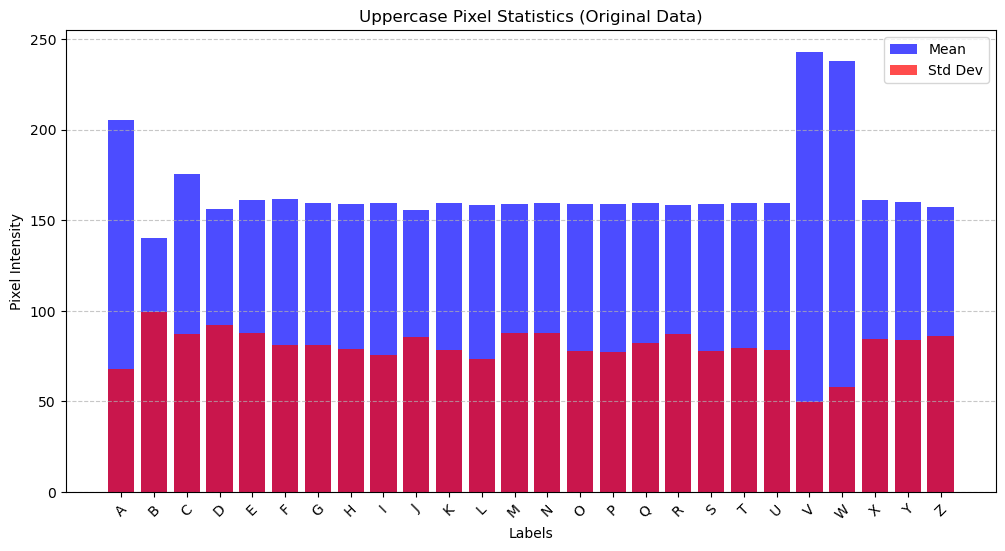

In [97]:
# Plot pixel statistics for original uppercase and lowercase data
plot_pixel_statistics(uppercase_images, uppercase_labels, "Uppercase Pixel Statistics (Original Data)")

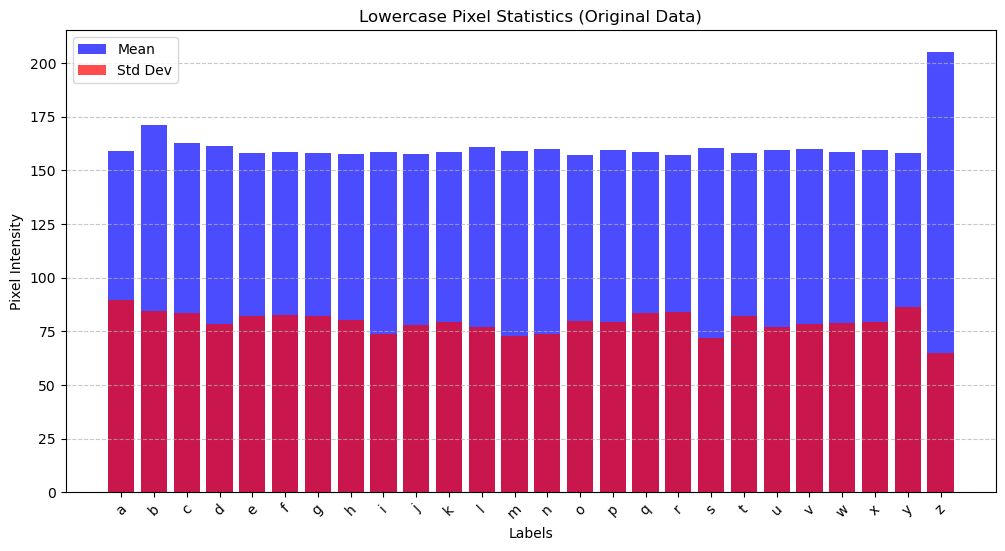

In [98]:
plot_pixel_statistics(lowercase_images, lowercase_labels, "Lowercase Pixel Statistics (Original Data)")

Enter a label (A-Z, a-z) or '#' to quit:  A


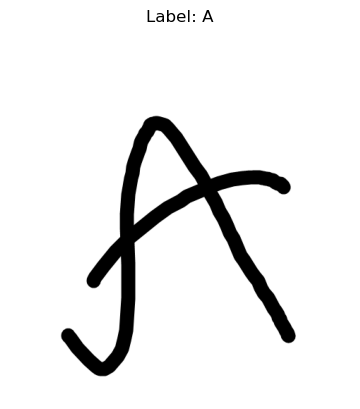

Enter a label (A-Z, a-z) or '#' to quit:  B


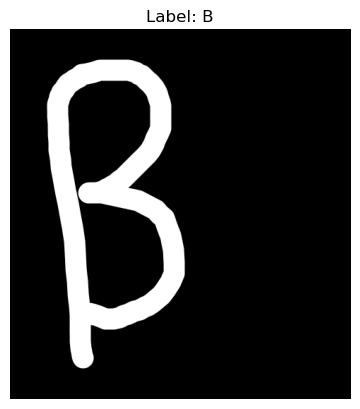

Enter a label (A-Z, a-z) or '#' to quit:  C


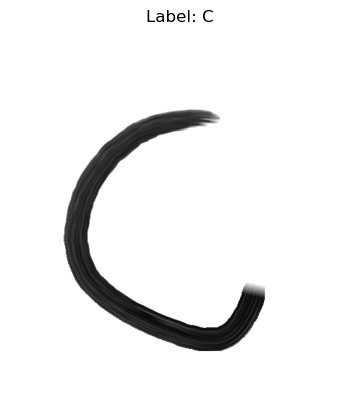

Enter a label (A-Z, a-z) or '#' to quit:  D


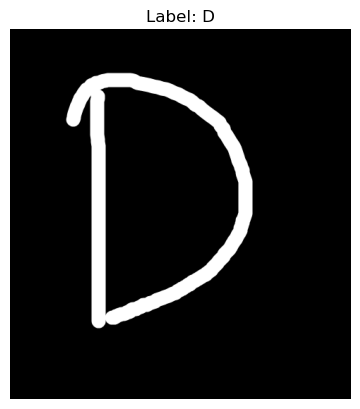

Enter a label (A-Z, a-z) or '#' to quit:  E


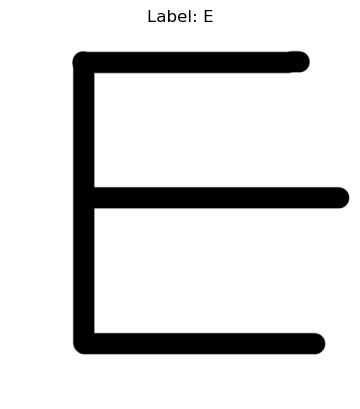

Enter a label (A-Z, a-z) or '#' to quit:  z


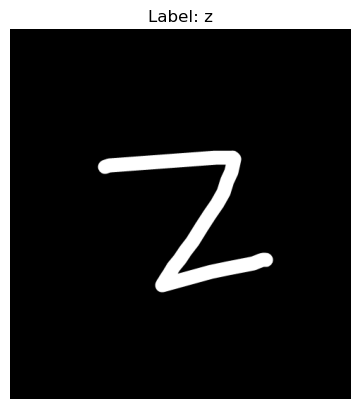

Enter a label (A-Z, a-z) or '#' to quit:  y


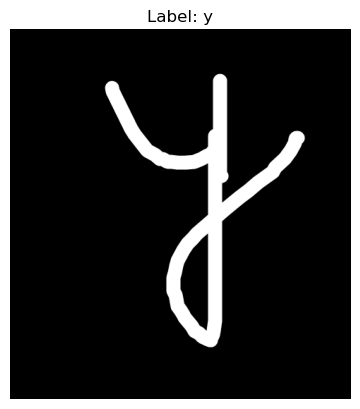

Enter a label (A-Z, a-z) or '#' to quit:  x


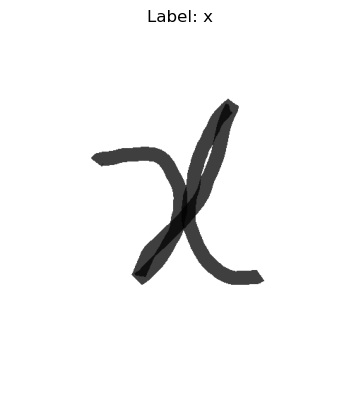

Enter a label (A-Z, a-z) or '#' to quit:  w


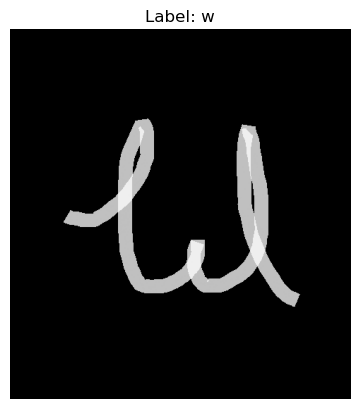

Enter a label (A-Z, a-z) or '#' to quit:  v


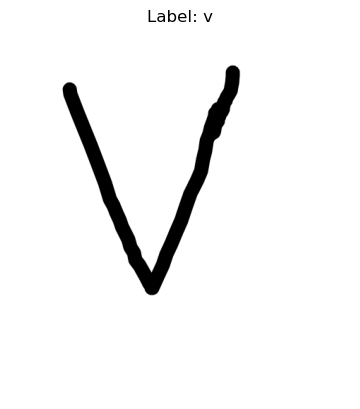

Enter a label (A-Z, a-z) or '#' to quit:  #


In [99]:
# Interactive label and image display
while True:
    label_input = input("Enter a label (A-Z, a-z) or '#' to quit: ")
    if label_input == '#':
        break
    try:
        label_index = all_labels.index(label_input)
        plt.imshow(all_images[label_index])
        plt.title(f"Label: {label_input}")
        plt.axis('off')
        plt.show()
    except ValueError:
        print("Invalid label. Please enter a valid label (A-Z, a-z) or '#' to quit.")

### ***4️⃣ Balancing Dataset***

In [101]:
# Function to balance images for each letter
def balance_images(src_dir, dest_dir, target_count=100):
    for letter in os.listdir(src_dir):
        letter_path = os.path.join(src_dir, letter)
        balanced_letter_path = os.path.join(dest_dir, letter)
        os.makedirs(balanced_letter_path, exist_ok=True)

        # List all images in the letter directory
        images = [img for img in tqdm(os.listdir(letter_path),desc=f"Balancing {letter}...") if img.endswith('.png')]

        # Randomly select images if more than target_count
        if len(images) > target_count:
            images_to_copy = random.sample(images, target_count)
        else:
            images_to_copy = images  # Keep all if less than or equal to target_count

        # Copy selected images to balanced directory
        for img in images_to_copy:
            src_img_path = os.path.join(letter_path, img)
            dest_img_path = os.path.join(balanced_letter_path, img)
            shutil.copy(src_img_path, dest_img_path)
    print("Dataset balancing complete!")

In [102]:
# Balance uppercase and lowercase images
balance_images(raw_uppercase_dir, balance_uppercase_dir, target_count=100)
balance_images(raw_lowercase_dir, balance_lowercase_dir, target_count=100)

Balancing Z...: 100%|████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


Dataset balancing complete!


Balancing z...: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 13252.98it/s]


Dataset balancing complete!


In [103]:
# Function to display random images from each label
def display_random_images(data_dir, title):
    """
    Displays a random image from each label folder in the specified directory.
    """
    labels = sorted(os.listdir(data_dir))
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(labels):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            images = os.listdir(label_dir)
            if images:
                img_path = os.path.join(label_dir, random.choice(images))
                img = Image.open(img_path)
                plt.subplot(5, 6, i+1)
                plt.imshow(img, cmap='gray')
                plt.title(label)
                plt.axis('off')
    plt.suptitle(title)
    plt.show()

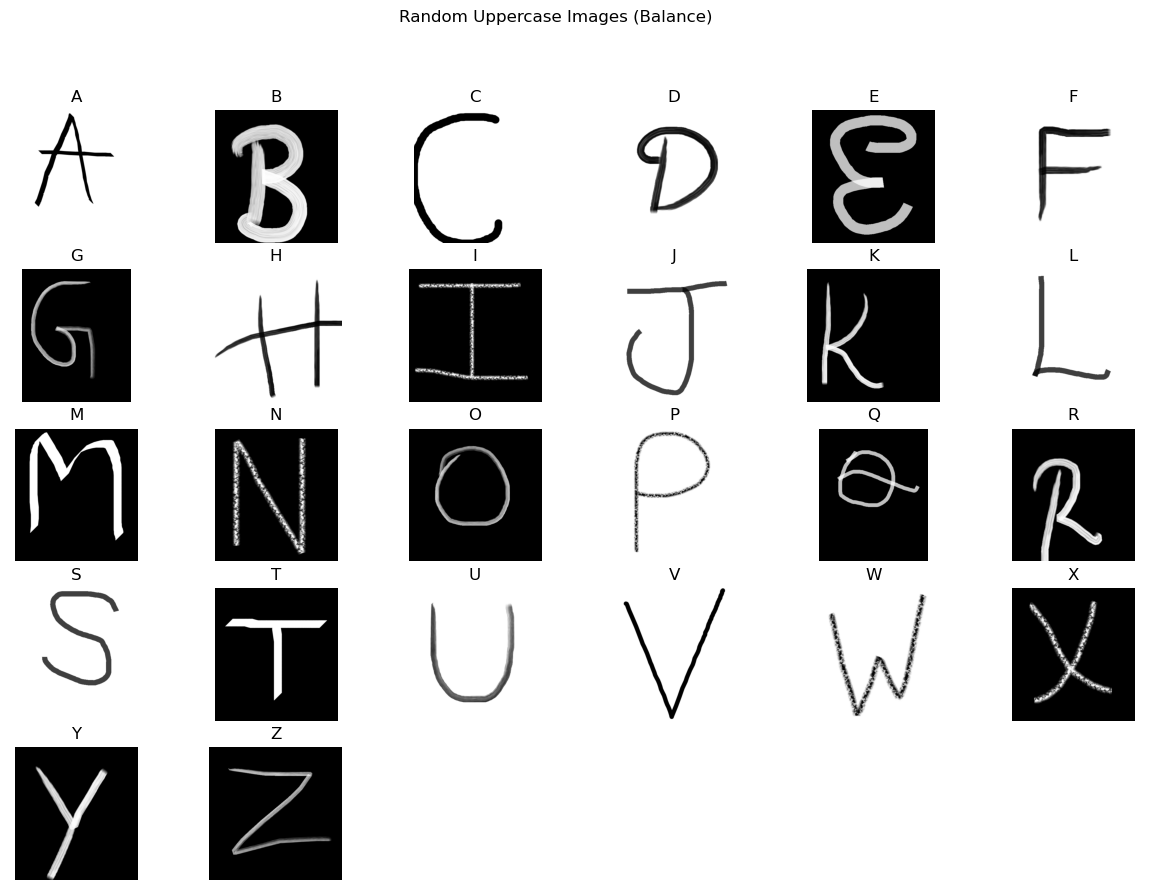

In [104]:
# Display random images for uppercase
display_random_images(balance_uppercase_dir, "Random Uppercase Images (Balance)")

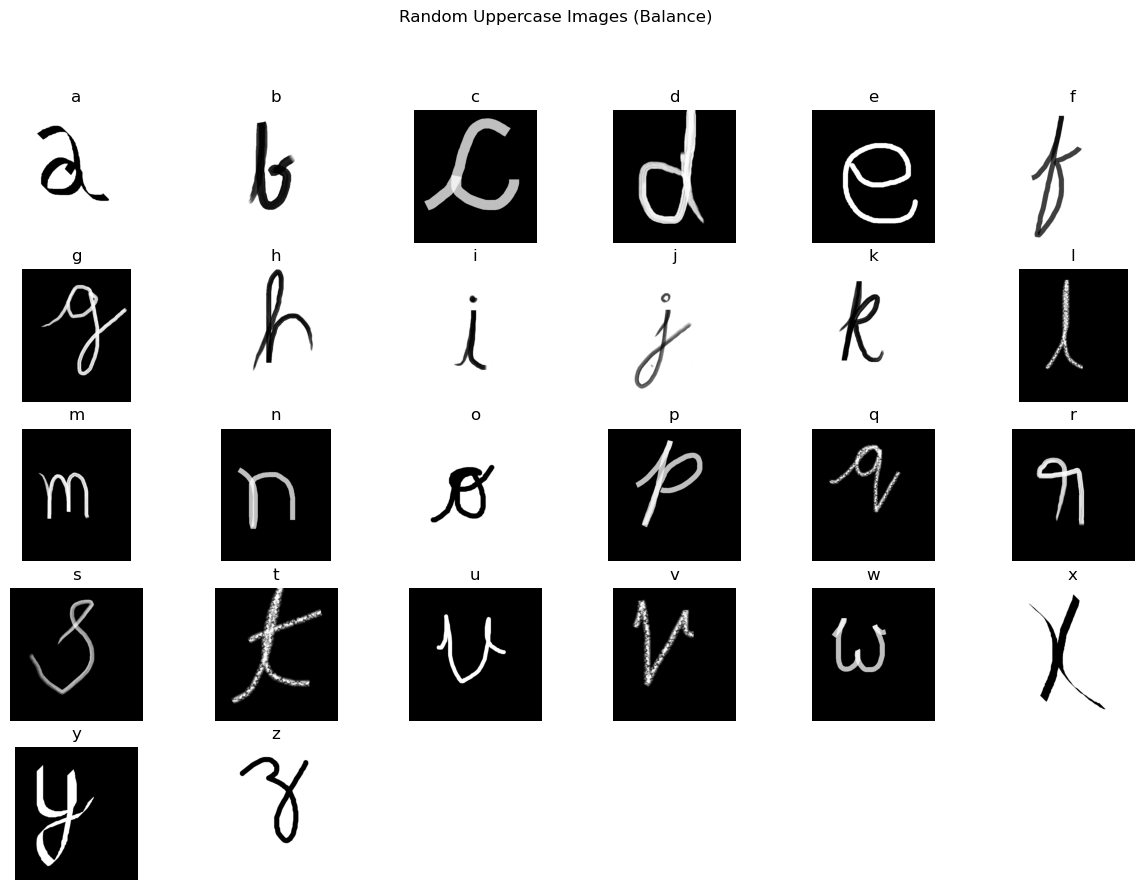

In [105]:
# Display random images for uppercase
display_random_images(balance_lowercase_dir, "Random Uppercase Images (Balance)")

In [106]:
# Initialize lists to store images and labels
balance_uppercase_img = []
balance_uppercase_labels = []
balance_lowercase_img = []
balance_lowercase_labels = []

In [107]:
# Load uppercase images
for folder in os.listdir(balance_uppercase_dir):
    folder_path = os.path.join(balance_uppercase_dir, folder)
    if os.path.isdir(folder_path):
        for filename in tqdm(os.listdir(folder_path), desc=f"Loading {folder}...."):
            if filename.endswith(".png"):
                img_path = os.path.join(folder_path, filename)
                try:
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    balance_uppercase_img.append(img_array)
                    balance_uppercase_labels.append(folder)
                except Exception as e:
                    print(f"Error loading image: {img_path}, Error: {e}")

Loading Z....: 100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.25it/s]


In [108]:
# Load uppercase images
for folder in os.listdir(balance_lowercase_dir):
    folder_path = os.path.join(balance_lowercase_dir, folder)
    if os.path.isdir(folder_path):
        for filename in tqdm(os.listdir(folder_path), desc=f"Loading {folder}...."):
            if filename.endswith(".png"):
                img_path = os.path.join(folder_path, filename)
                try:
                    img = Image.open(img_path)
                    img_array = np.array(img)
                    balance_lowercase_img.append(img_array)
                    balance_lowercase_labels.append(folder)
                except Exception as e:
                    print(f"Error loading image: {img_path}, Error: {e}")

Loading z....: 100%|█████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 55.51it/s]


In [109]:
# Get image shapes and lengths
balance_uppercase_img_shape = balance_uppercase_img[0].shape
balance_lowercase_img_shape = balance_lowercase_img[0].shape
balance_uppercase_img_count = len(balance_uppercase_img)
balance_lowercase_count = len(balance_lowercase_img)

print(f"Uppercase Image Shape: {balance_uppercase_img_shape}")
print(f"Lowercase Image Shape: {lowercase_image_shape}")
print(f"Number of Uppercase Images: {balance_uppercase_img_count}")
print(f"Number of Lowercase Images: {balance_lowercase_count}")

Uppercase Image Shape: (525, 483, 4)
Lowercase Image Shape: (525, 483, 4)
Number of Uppercase Images: 2600
Number of Lowercase Images: 2600


In [110]:
balance_img = balance_uppercase_img + balance_lowercase_img
balance_labels = balance_uppercase_labels + balance_lowercase_labels

In [111]:
# Get unique labels and their counts
blance_img_labels, balance_img_count = np.unique(balance_labels, return_counts=True)
balance_uppercase_img_labels, balance_uppercase_img_count = np.unique(balance_uppercase_labels, return_counts=True)
balance_lowercase_img_labels, balance_lowercase_img_count = np.unique(balance_lowercase_labels, return_counts=True)

In [112]:
# Create a DataFrame to store label counts
balance_upper_label_counts= pd.DataFrame({'Label': balance_uppercase_img_labels, 'Count': balance_uppercase_img_count})

# Sort the DataFrame by Label (A-Z, a-z)
balance_upper_label_counts= balance_upper_label_counts.sort_values(by='Label')

print("Label Counts:")
display(balance_upper_label_counts)

Label Counts:


Label  Count
0      A    100
1      B    100
2      C    100
3      D    100
4      E    100
5      F    100
6      G    100
7      H    100
8      I    100
9      J    100
10     K    100
11     L    100
12     M    100
13     N    100
14     O    100
15     P    100
16     Q    100
17     R    100
18     S    100
19     T    100
20     U    100
21     V    100
22     W    100
23     X    100
24     Y    100
25     Z    100

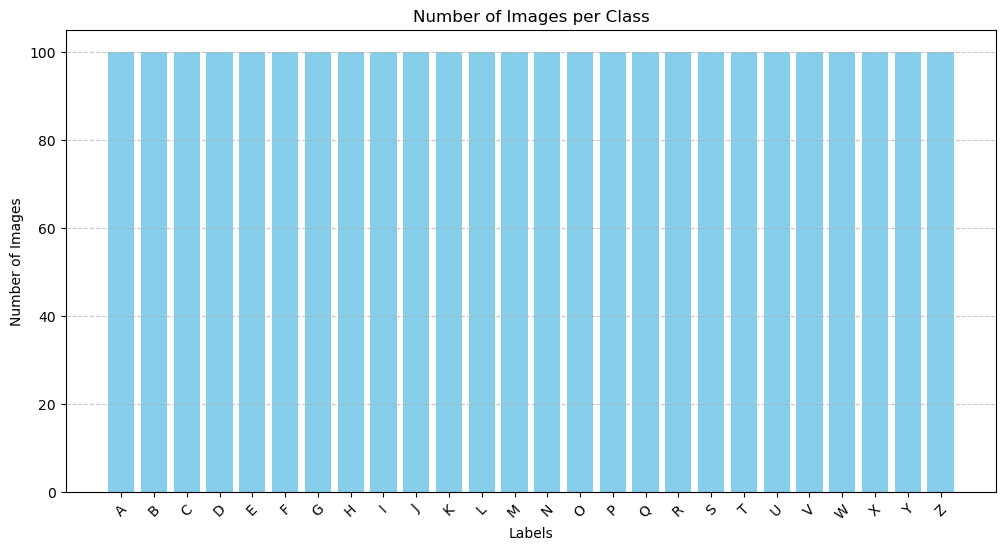

In [113]:
# Visualize the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(balance_upper_label_counts['Label'], balance_upper_label_counts['Count'], color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

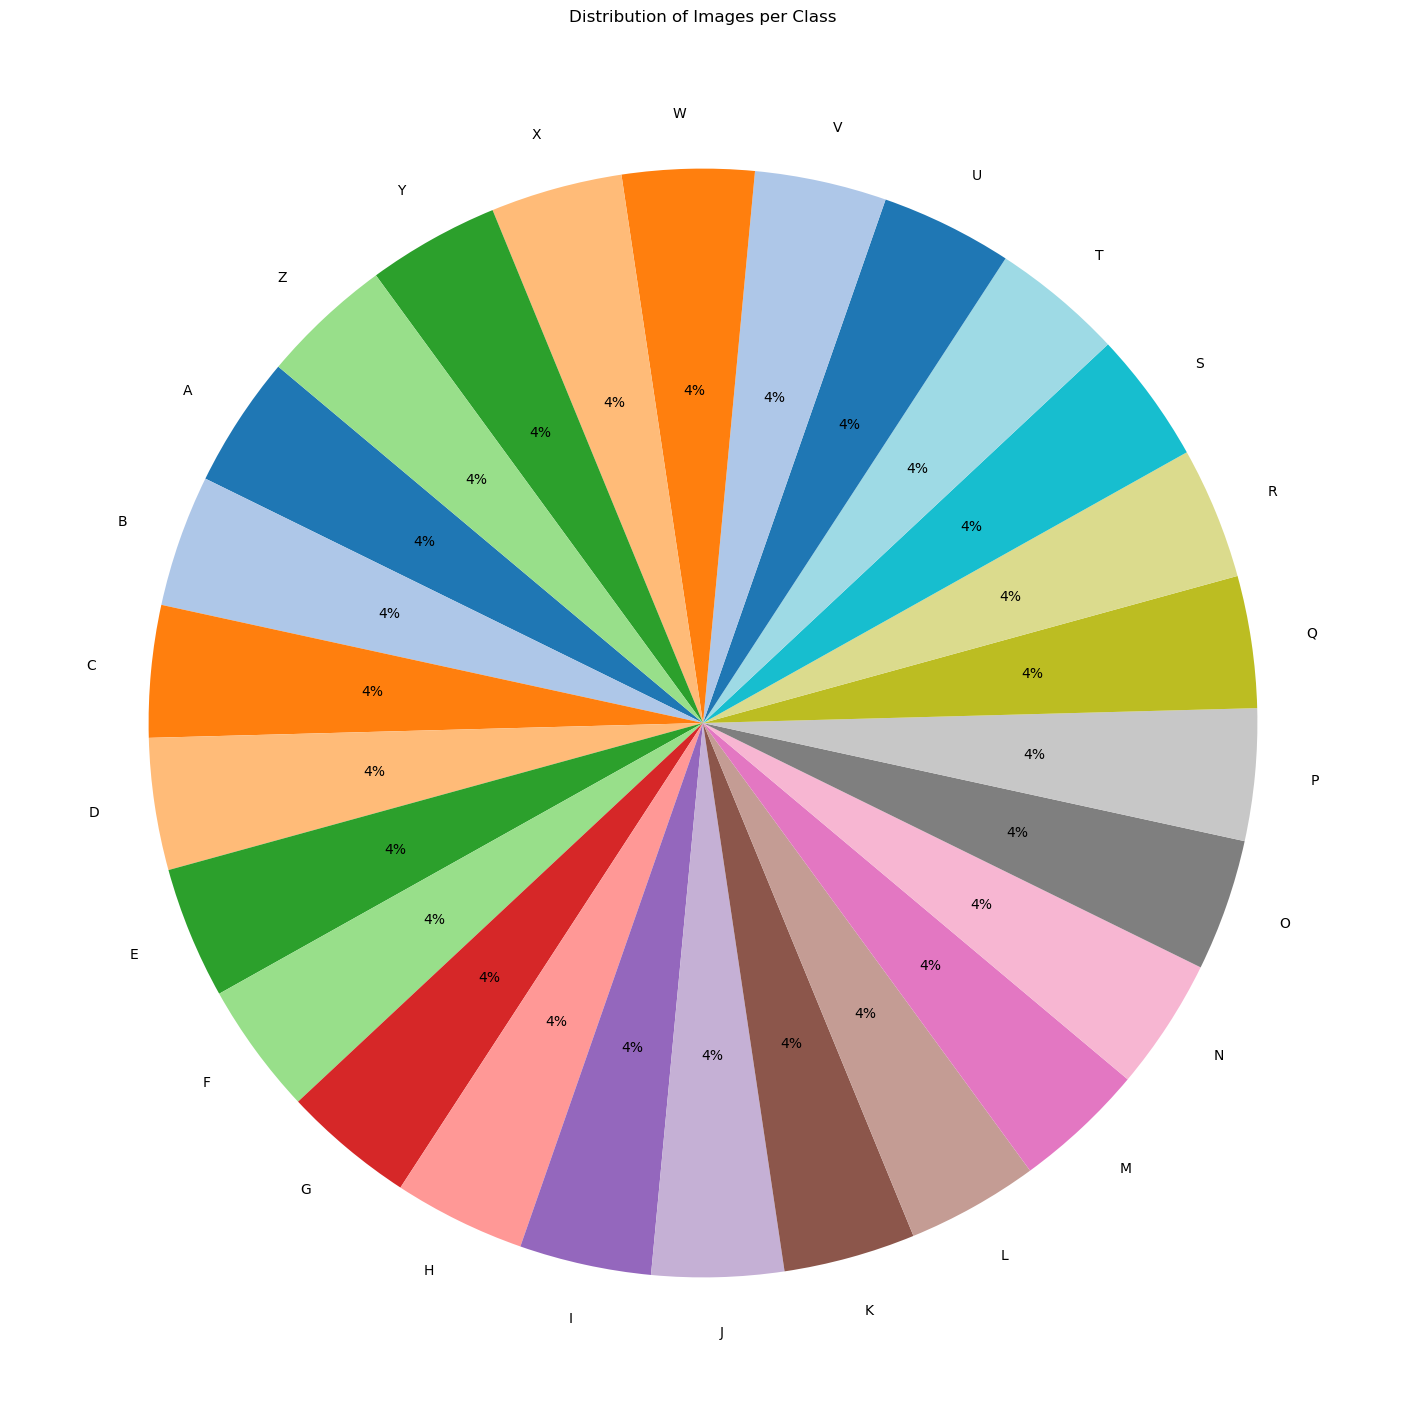

In [114]:
# Pie chart for distribution of images per class
plt.figure(figsize=(18, 18))
plt.pie(balance_uppercase_img_count, labels=balance_uppercase_img_labels, autopct='%1.f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Images per Class")
plt.show()

In [115]:
# Create a DataFrame to store label counts
balance_lower_label_counts= pd.DataFrame({'Label': balance_lowercase_img_labels, 'Count': balance_lowercase_img_count})

# Sort the DataFrame by Label (A-Z, a-z)
balance_lower_label_counts= balance_lower_label_counts.sort_values(by='Label')

print("Label Counts:")
display(balance_lower_label_counts)

Label Counts:


Label  Count
0      a    100
1      b    100
2      c    100
3      d    100
4      e    100
5      f    100
6      g    100
7      h    100
8      i    100
9      j    100
10     k    100
11     l    100
12     m    100
13     n    100
14     o    100
15     p    100
16     q    100
17     r    100
18     s    100
19     t    100
20     u    100
21     v    100
22     w    100
23     x    100
24     y    100
25     z    100

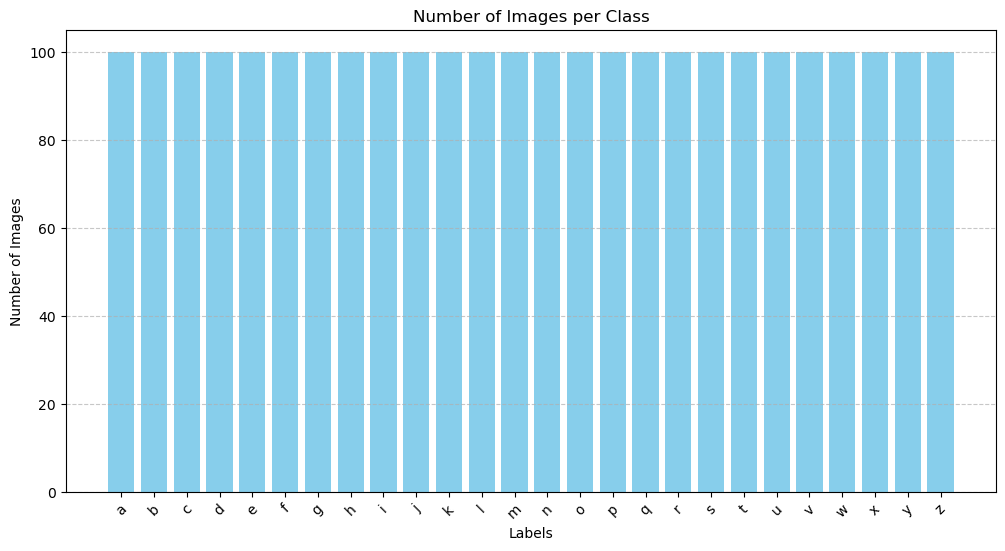

In [116]:
# Visualize the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(balance_lower_label_counts['Label'], balance_lower_label_counts['Count'], color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

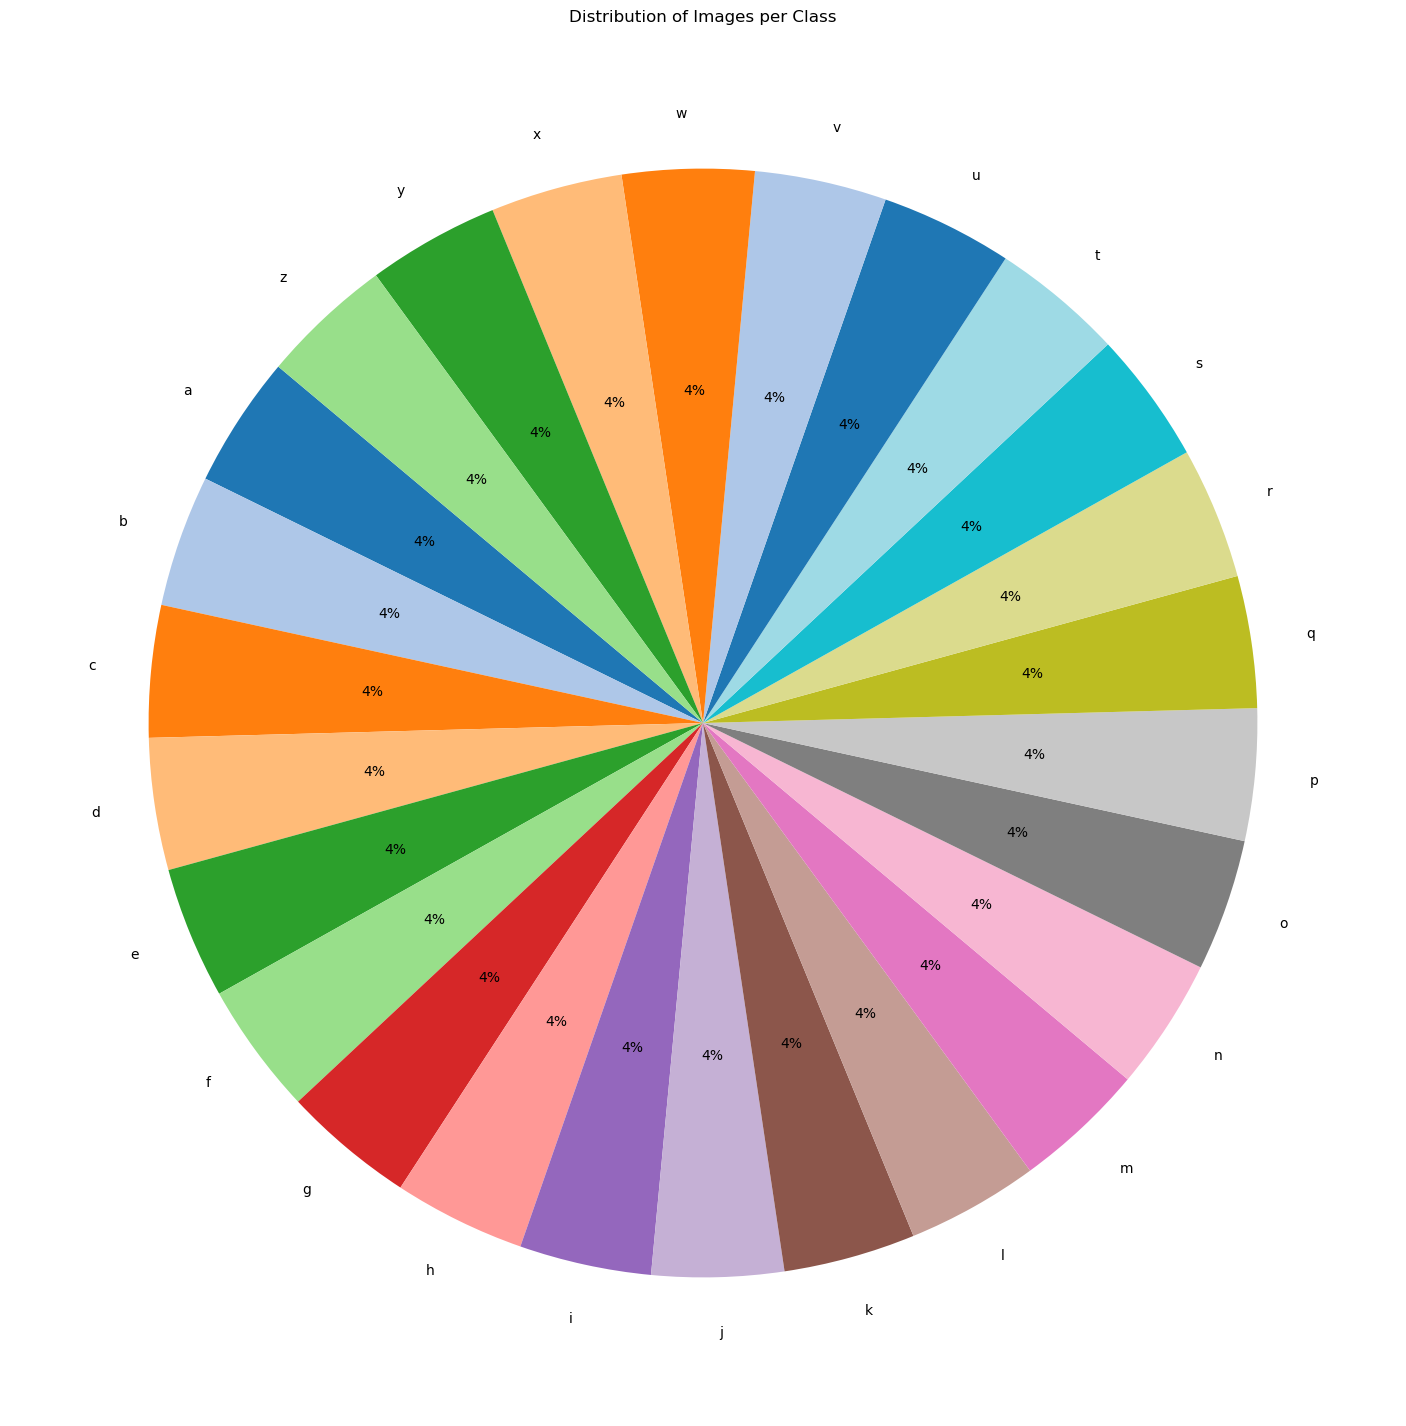

In [117]:
# Pie chart for distribution of images per class
plt.figure(figsize=(18, 18))
plt.pie(balance_lowercase_img_count, labels=balance_lowercase_img_labels, autopct='%1.f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Images per Class")
plt.show()

In [118]:
# Create a DataFrame to store label counts
balance_label_counts= pd.DataFrame({'Label': blance_img_labels, 'Count': balance_img_count})

# Sort the DataFrame by Label (A-Z, a-z)
balance_label_counts= balance_label_counts.sort_values(by='Label')

print("Label Counts:")
display(balance_label_counts)

Label Counts:


Label  Count
0      A    100
1      B    100
2      C    100
3      D    100
4      E    100
5      F    100
6      G    100
7      H    100
8      I    100
9      J    100
10     K    100
11     L    100
12     M    100
13     N    100
14     O    100
15     P    100
16     Q    100
17     R    100
18     S    100
19     T    100
20     U    100
21     V    100
22     W    100
23     X    100
24     Y    100
25     Z    100
26     a    100
27     b    100
28     c    100
29     d    100
30     e    100
31     f    100
32     g    100
33     h    100
34     i    100
35     j    100
36     k    100
37     l    100
38     m    100
39     n    100
40     o    100
41     p    100
42     q    100
43     r    100
44     s    100
45     t    100
46     u    100
47     v    100
48     w    100
49     x    100
50     y    100
51     z    100

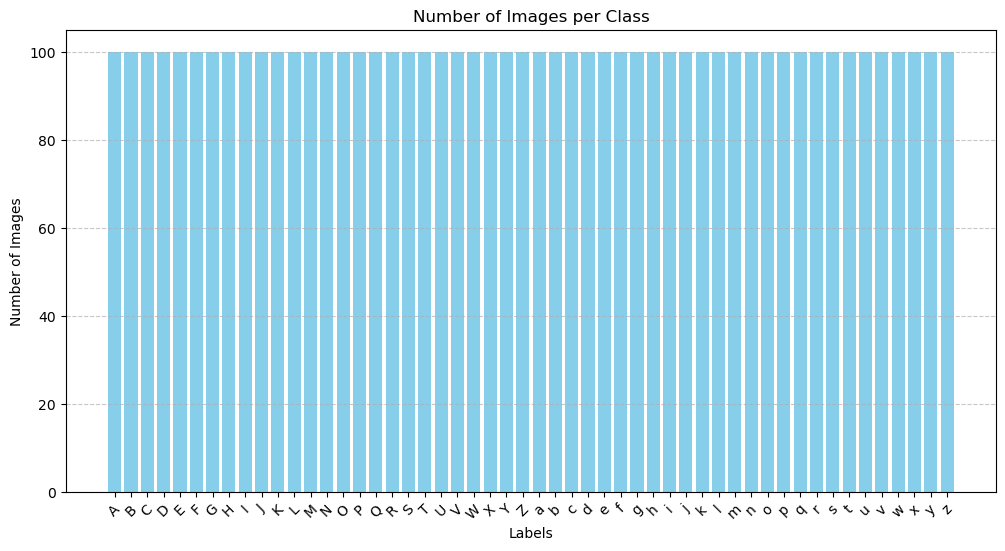

In [119]:
# Visualize the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(balance_label_counts['Label'], balance_label_counts['Count'], color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

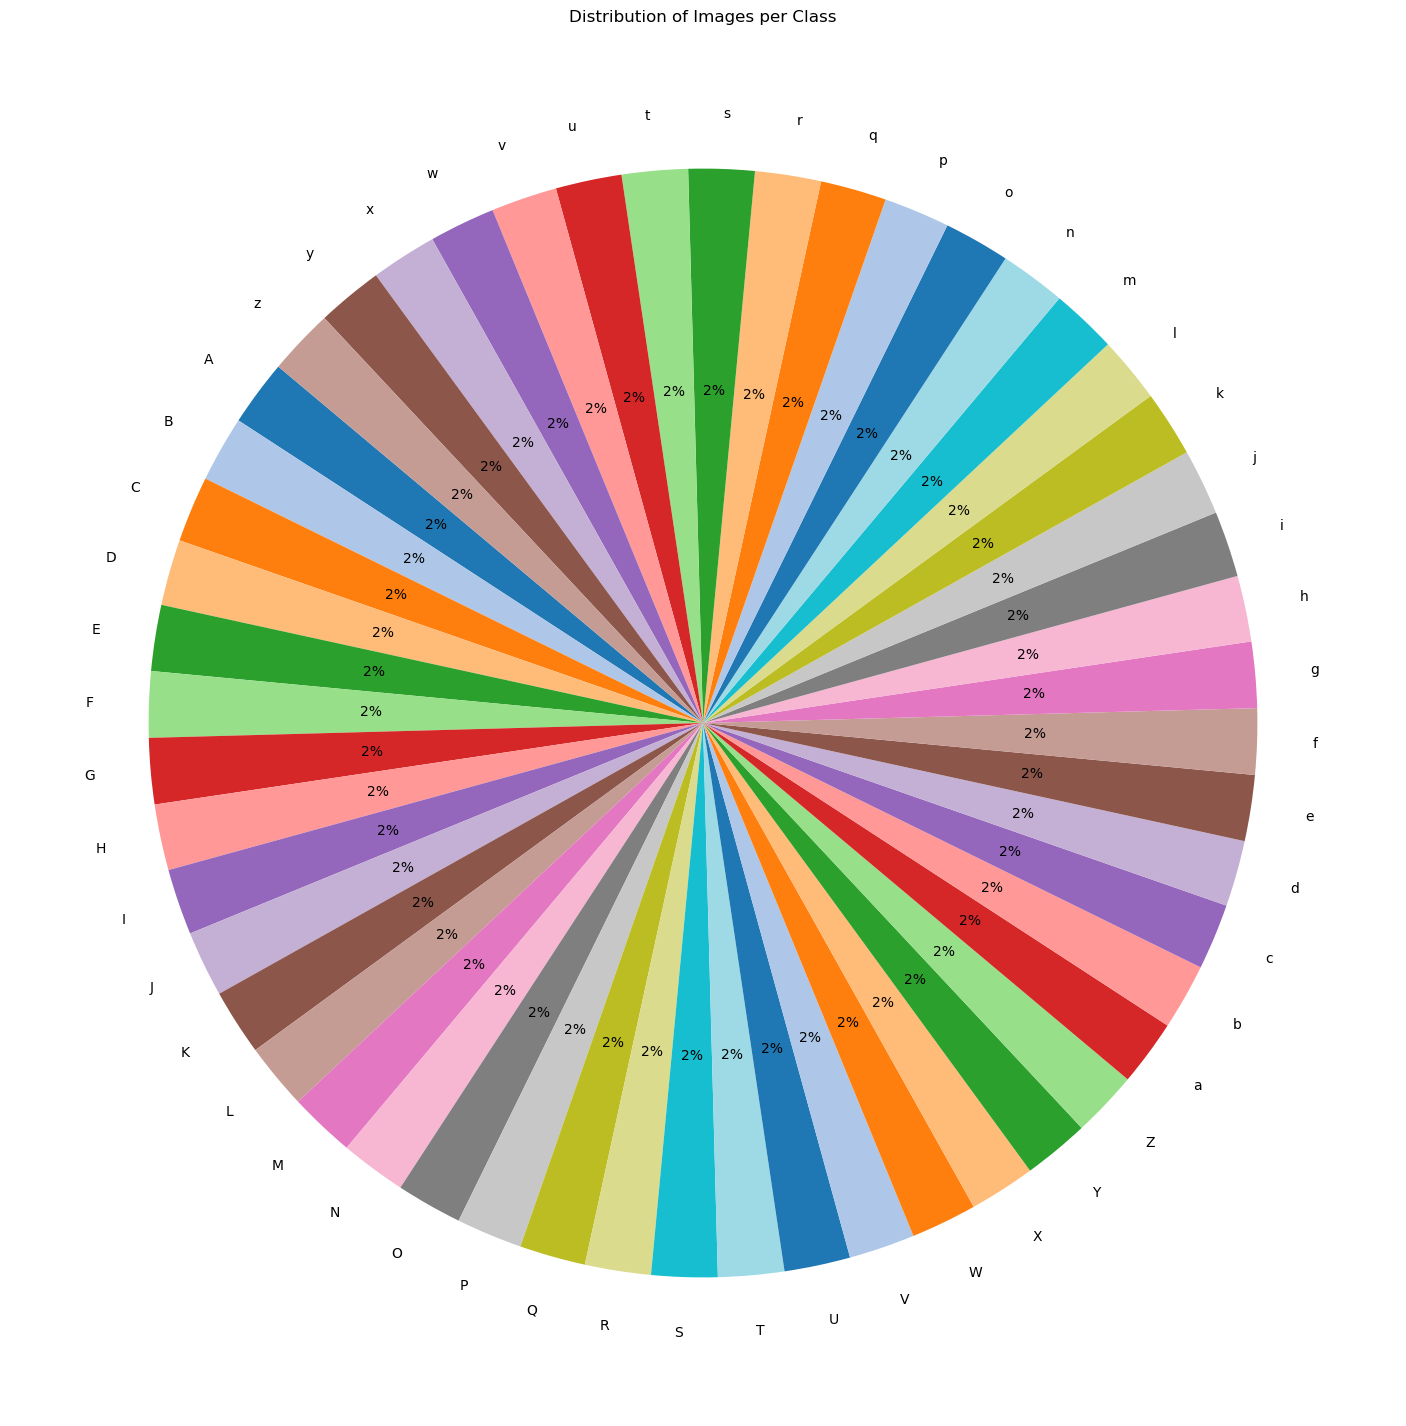

In [120]:
# Pie chart for distribution of images per class
plt.figure(figsize=(18, 18))
plt.pie(balance_img_count, labels=blance_img_labels, autopct='%1.f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Images per Class")
plt.show()

### ***5️⃣ Preprocessing***

In [122]:
# Define preprocessing parameters
target_size = (28, 28)  # Resize images to 28x28
normalize = True        # Normalize pixel values to [0, 1]
augment = True          # Apply data augmentation

In [123]:
# Define augmentation parameters
rotation_range = (-10, 10)  # Rotate images by ±10 degrees
translation_range = (-5, 5) # Translate images by ±5 pixels
scale_range = (0.9, 1.1)    # Scale images by 90% to 110%

In [124]:
# Function to apply augmentation
def augment_image(img):
    """
    Applies random augmentation to an image.
    """
    # Rotation
    angle = random.uniform(rotation_range[0], rotation_range[1])
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    img = cv2.warpAffine(img, M, (cols, rows))

    # Translation
    tx = random.uniform(translation_range[0], translation_range[1])
    ty = random.uniform(translation_range[0], translation_range[1])
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    img = cv2.warpAffine(img, M, (cols, rows))

    # Scaling
    scale = random.uniform(scale_range[0], scale_range[1])
    img = cv2.resize(img, None, fx=scale, fy=scale)
    img = cv2.resize(img, target_size)  # Resize back to target size

    return img

In [125]:
# Preprocess and save uppercase images
for folder in os.listdir(balance_uppercase_dir):
    folder_path = os.path.join(balance_uppercase_dir, folder)
    if os.path.isdir(folder_path):
        # Create corresponding folder in augmentation directory
        aug_folder_path = os.path.join(aug_uppercase_dir, folder)
        os.makedirs(aug_folder_path, exist_ok=True)

        for filename in tqdm(os.listdir(folder_path), desc=f"Processing {folder} Images....."):
            if filename.endswith(".png"):
                img_path = os.path.join(folder_path, filename)
                try:
                    # Load image
                    img = Image.open(img_path)
                    img = img.resize(target_size)  # Resize
                    img = img.convert('L')         # Convert to grayscale
                    img_array = np.array(img)

                    # Normalize
                    if normalize:
                        img_array = img_array / 255.0

                    # Augment
                    if augment:
                        img_array = augment_image(img_array)

                    # Save preprocessed image
                    aug_img_path = os.path.join(aug_folder_path, filename)
                    Image.fromarray((img_array * 255).astype(np.uint8)).save(aug_img_path)

                except Exception as e:
                    print(f"Error processing image: {img_path}, Error: {e}")

Processing Z Images.....: 100%|██████████████████████████████████████████████████████| 100/100 [00:01<00:00, 90.57it/s]


In [126]:
# Preprocess and save lowercase images
for folder in os.listdir(balance_lowercase_dir):
    folder_path = os.path.join(balance_lowercase_dir, folder)
    if os.path.isdir(folder_path):
        # Create corresponding folder in augmentation directory
        aug_folder_path = os.path.join(aug_lowercase_dir, folder)
        os.makedirs(aug_folder_path, exist_ok=True)

        for filename in tqdm(os.listdir(folder_path), desc=f"Processing {folder} Images..."):
            if filename.endswith(".png"):
                img_path = os.path.join(folder_path, filename)
                try:
                    # Load image
                    img = Image.open(img_path)
                    img = img.resize(target_size)  # Resize
                    img = img.convert('L')         # Convert to grayscale
                    img_array = np.array(img)

                    # Normalize
                    if normalize:
                        img_array = img_array / 255.0

                    # Augment
                    if augment:
                        img_array = augment_image(img_array)

                    # Save preprocessed image
                    aug_img_path = os.path.join(aug_folder_path, filename)
                    Image.fromarray((img_array * 255).astype(np.uint8)).save(aug_img_path)

                except Exception as e:
                    print(f"Error processing image: {img_path}, Error: {e}")

Processing z Images...: 100%|████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 72.02it/s]


In [127]:
# Function to display random images from each label
def display_random_images(data_dir, title):
    """
    Displays a random image from each label folder in the specified directory.
    """
    labels = sorted(os.listdir(data_dir))
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(labels):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            images = os.listdir(label_dir)
            if images:
                img_path = os.path.join(label_dir, random.choice(images))
                img = Image.open(img_path)
                plt.subplot(5, 6, i+1)
                plt.imshow(img, cmap='gray')
                plt.title(label)
                plt.axis('off')
    plt.suptitle(title)
    plt.show()

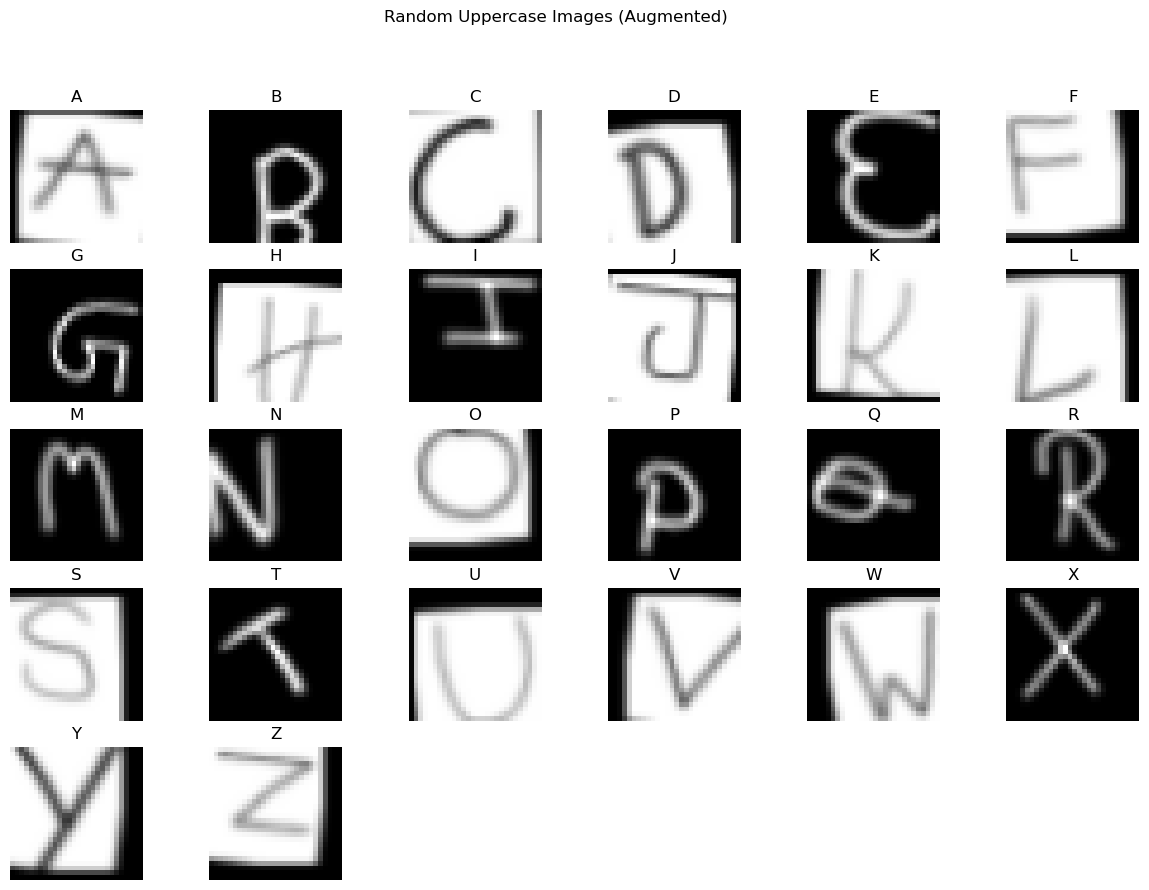

In [128]:
# Display random images for uppercase
display_random_images(aug_uppercase_dir, "Random Uppercase Images (Augmented)")

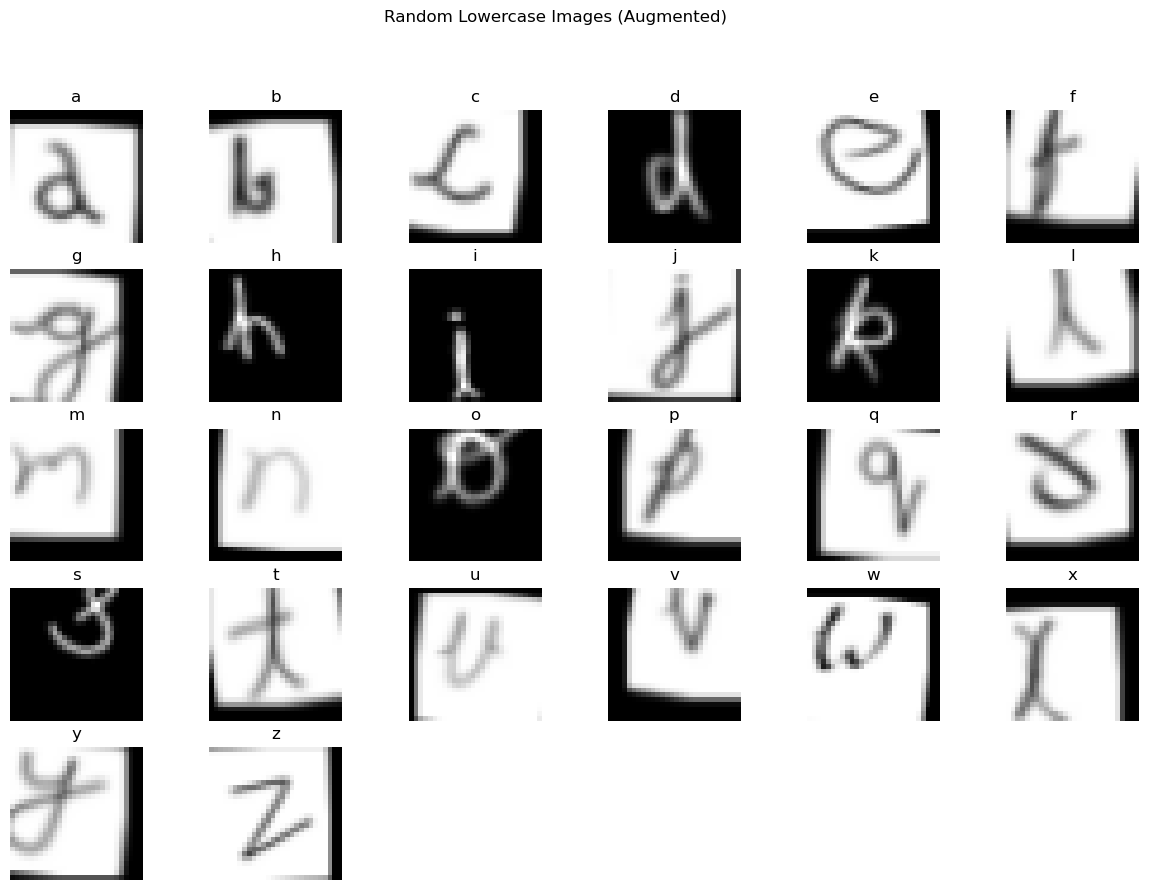

In [129]:
# Display random images for lowercase
display_random_images(aug_lowercase_dir, "Random Lowercase Images (Augmented)")

In [130]:
# Function to display user-defined label and number of images
def display_user_defined_images(raw_dir, aug_dir, label, num_images):
    """
    Displays a user-defined number of images for a specific label from both raw and augmented directories.
    """
    raw_label_dir = os.path.join(raw_dir, label)
    aug_label_dir = os.path.join(aug_dir, label)

    if os.path.isdir(raw_label_dir) and os.path.isdir(aug_label_dir):
        raw_images = os.listdir(raw_label_dir)[:num_images]
        aug_images = os.listdir(aug_label_dir)[:num_images]

        plt.figure(figsize=(15, 5))
        for i, (raw_img_name, aug_img_name) in enumerate(zip(raw_images, aug_images)):
            # Display original image
            raw_img_path = os.path.join(raw_label_dir, raw_img_name)
            raw_img = Image.open(raw_img_path)
            plt.subplot(2, num_images, i+1)
            plt.imshow(raw_img, cmap='gray')
            plt.title(f"Original: {label}")
            plt.axis('off')

            # Display preprocessed image
            aug_img_path = os.path.join(aug_label_dir, aug_img_name)
            aug_img = Image.open(aug_img_path)
            plt.subplot(2, num_images, num_images + i+1)
            plt.imshow(aug_img, cmap='gray')
            plt.title(f"Preprocessed: {label}")
            plt.axis('off')
        plt.suptitle(f"Original vs Preprocessed Images for Label: {label}")
        plt.show()
    else:
        print(f"Label '{label}' not found in both directories.")

Enter a label (A-Z):  A
Enter the number of images to display:  5


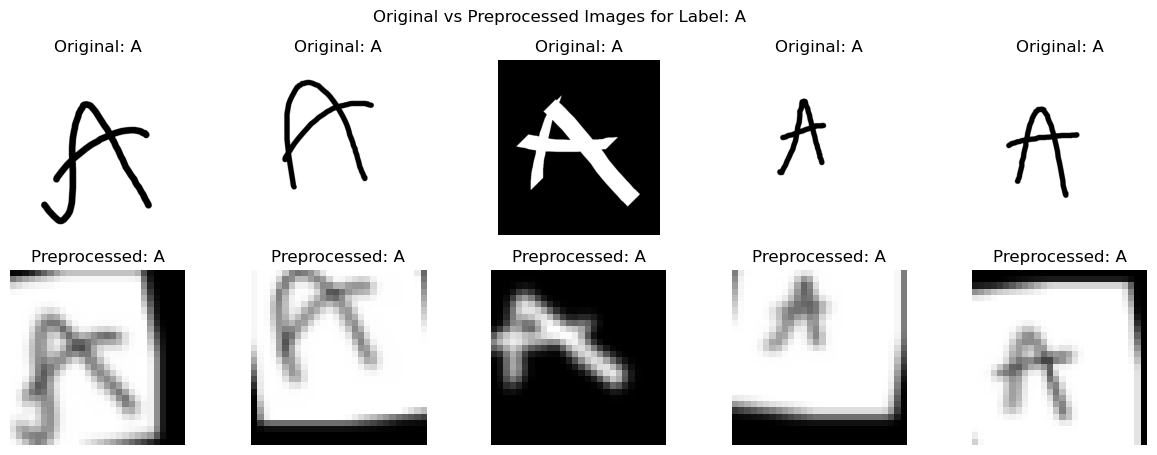

In [131]:
# User input for label and number of images
label_input = input("Enter a label (A-Z): ")
num_images_input = int(input("Enter the number of images to display: "))
display_user_defined_images(balance_uppercase_dir, aug_uppercase_dir, label_input.upper(), num_images_input)

Enter a label (a-z):  h
Enter the number of images to display:  5


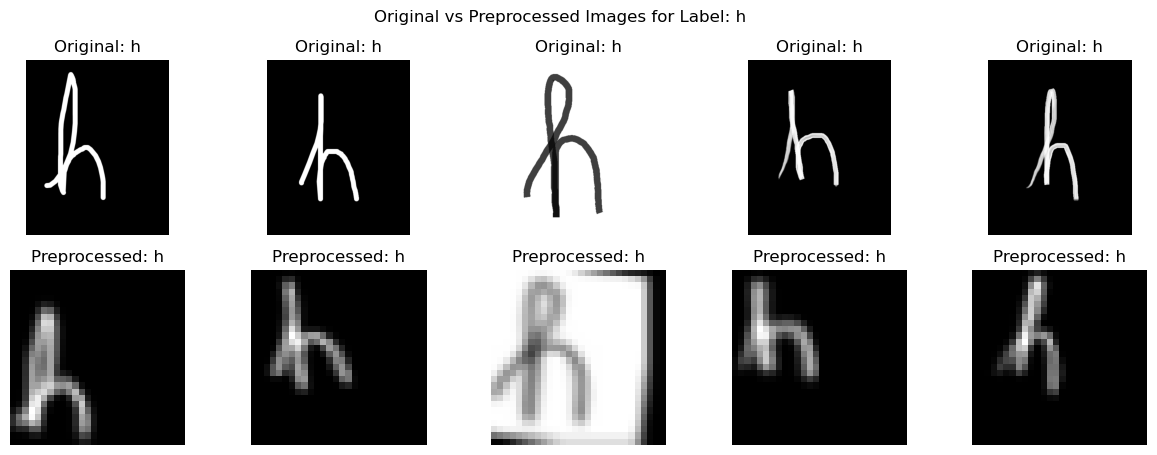

In [132]:
# User input for label and number of images
label_input = input("Enter a label (a-z): ")
num_images_input = int(input("Enter the number of images to display: "))
display_user_defined_images(balance_lowercase_dir, aug_lowercase_dir, label_input.lower(), num_images_input)

In [133]:
# Size comparison of original and processed images
def compare_image_sizes(raw_dir, aug_dir, label):
    """
    Compares the sizes of original and preprocessed images for a specific label.
    """
    raw_label_dir = os.path.join(raw_dir, label)
    aug_label_dir = os.path.join(aug_dir, label)

    if os.path.isdir(raw_label_dir) and os.path.isdir(aug_label_dir):
        raw_img_path = os.path.join(raw_label_dir, os.listdir(raw_label_dir)[5])
        aug_img_path = os.path.join(aug_label_dir, os.listdir(aug_label_dir)[5])

        raw_img = Image.open(raw_img_path)
        aug_img = Image.open(aug_img_path)

        print(f"Original Image Size: {raw_img.size}")
        print(f"Preprocessed Image Size: {aug_img.size}")

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(raw_img, cmap='gray')
        plt.title(f"Original: {label}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(aug_img, cmap='gray')
        plt.title(f"Preprocessed: {label}")
        plt.axis('off')
        plt.suptitle(f"Size Comparison for Label: {label}")
        plt.show()
    else:
        print(f"Label '{label}' not found in both directories.")

Original Image Size: (483, 525)
Preprocessed Image Size: (28, 28)


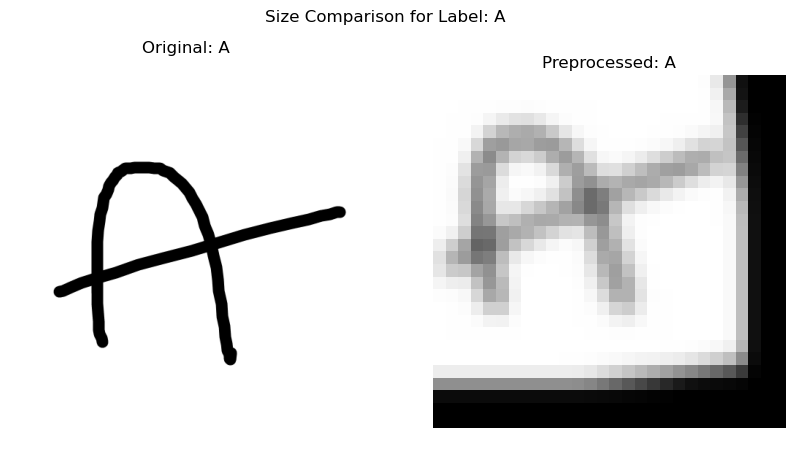

In [134]:
# Compare sizes for a sample label
compare_image_sizes(balance_uppercase_dir, aug_uppercase_dir, "A")

Original Image Size: (483, 525)
Preprocessed Image Size: (28, 28)


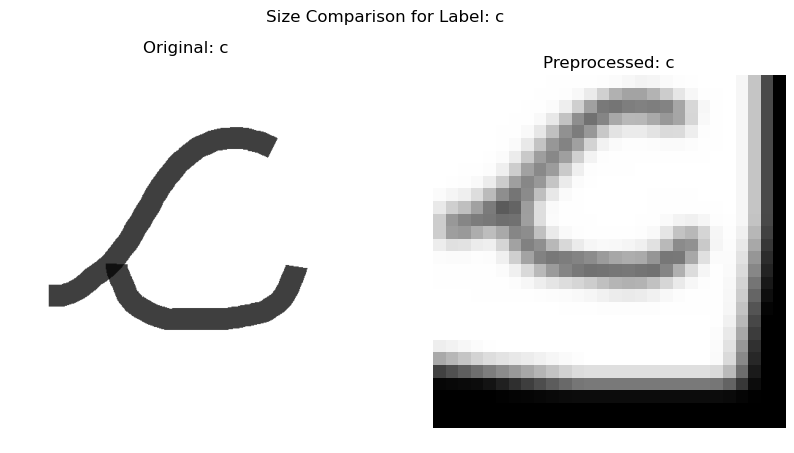

In [135]:
# Compare sizes for a sample label
compare_image_sizes(balance_lowercase_dir, aug_lowercase_dir, "c")

In [136]:
# Histogram of pixel intensities for original and preprocessed images
def plot_pixel_histogram(raw_dir, aug_dir, label):
    """
    Plots histograms of pixel intensities for original and preprocessed images.
    """
    raw_label_dir = os.path.join(raw_dir, label)
    aug_label_dir = os.path.join(aug_dir, label)

    if os.path.isdir(raw_label_dir) and os.path.isdir(aug_label_dir):
        raw_img_path = os.path.join(raw_label_dir, os.listdir(raw_label_dir)[0])
        aug_img_path = os.path.join(aug_label_dir, os.listdir(aug_label_dir)[0])

        raw_img = np.array(Image.open(raw_img_path))
        aug_img = np.array(Image.open(aug_img_path))

        plt.figure(figsize=(15, 4))
        plt.subplot(1, 2, 1)
        plt.hist(raw_img.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
        plt.title(f"Original: {label}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")

        plt.subplot(1, 2, 2)
        plt.hist(aug_img.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
        plt.title(f"Preprocessed: {label}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.suptitle(f"Pixel Intensity Histograms for Label: {label}")
        plt.show()
    else:
        print(f"Label '{label}' not found in both directories.")

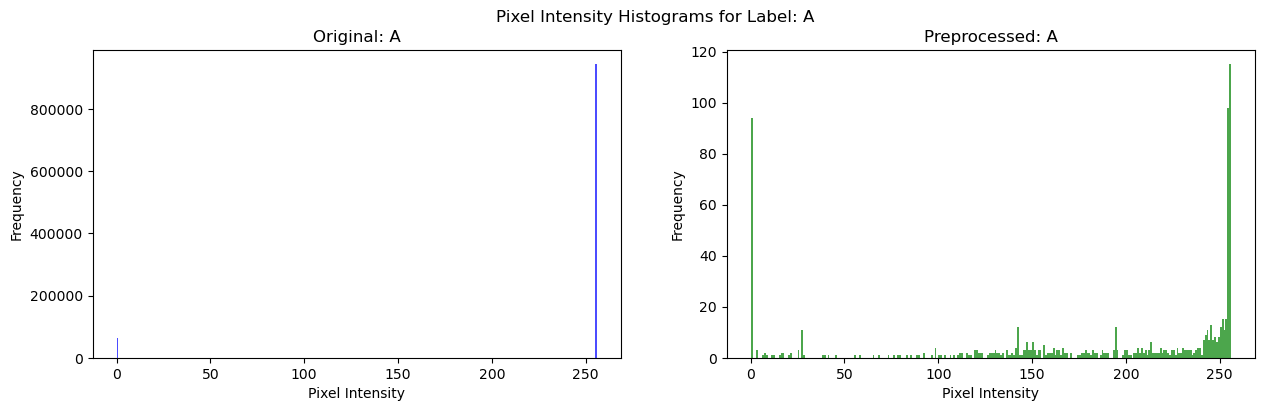

In [137]:
# Plot histograms for a sample label
plot_pixel_histogram(balance_uppercase_dir, aug_uppercase_dir, "A")

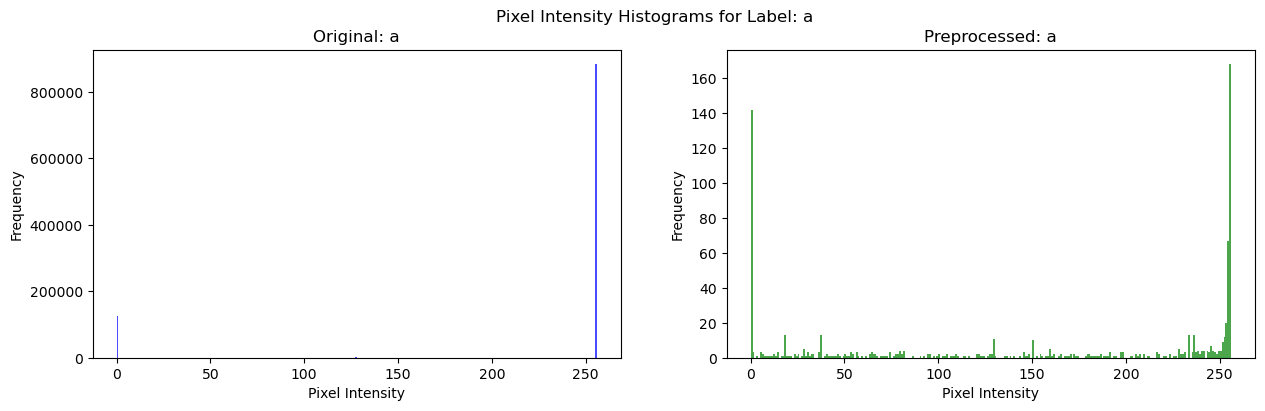

In [138]:
# Plot histograms for a sample label
plot_pixel_histogram(balance_lowercase_dir, aug_lowercase_dir, "a")

In [139]:
# Function to display a grid of images for a specific label
def display_label_image_grid(data_dir, label, num_images=25):
    """
    Displays a grid of images for a specific label.
    """
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        images = os.listdir(label_dir)
        if images:
            plt.figure(figsize=(10, 10))
            for i in range(min(num_images, len(images))):
                img_path = os.path.join(label_dir, images[i])
                img = Image.open(img_path)
                plt.subplot(5, 5, i+1)
                plt.imshow(img, cmap='gray')
                plt.title(f"Label: {label}")
                plt.axis('off')
            plt.suptitle(f"Image Grid for Label: {label}")
            plt.show()
        else:
            print(f"No images found for label: {label}")
    else:
        print(f"Label '{label}' not found in directory.")

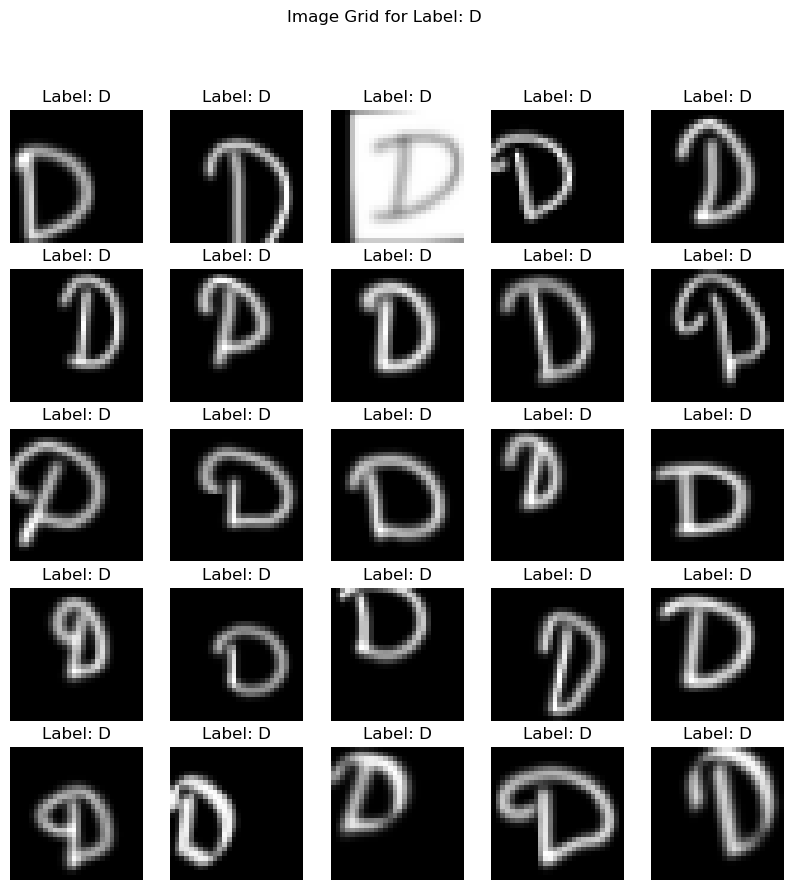

In [140]:
# Display image grid for a specific label
display_label_image_grid(aug_uppercase_dir, "D")

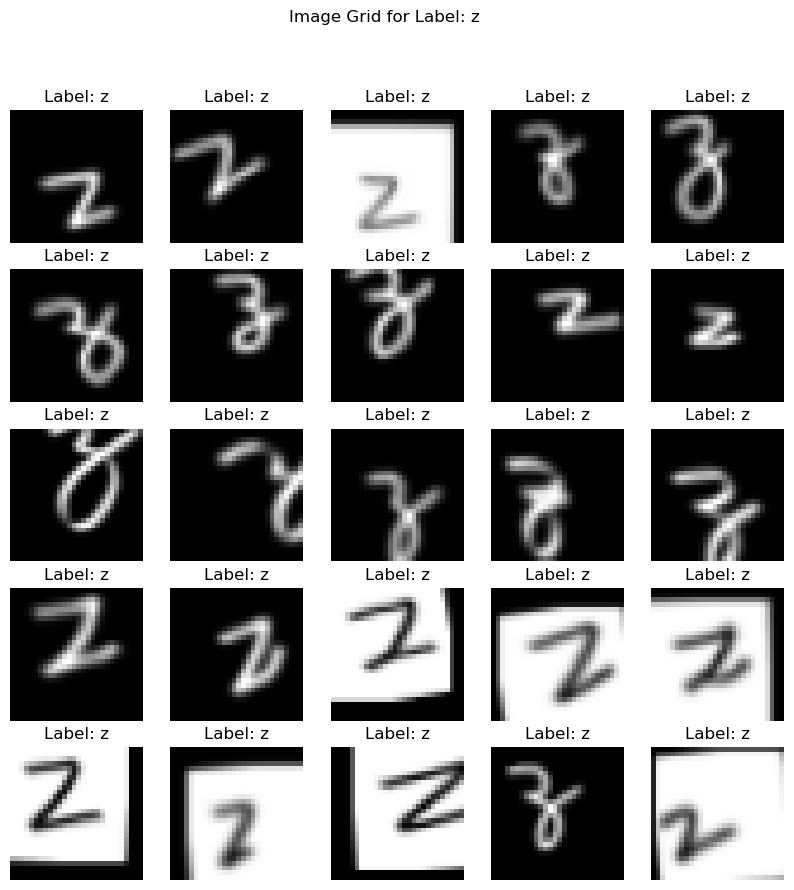

In [141]:
# Display image grid for a specific label
display_label_image_grid(aug_lowercase_dir, "z")

In [142]:
# Function to visualize augmentation effects
def visualize_augmentation_effects(data_dir, label):
    """
    Visualizes the effects of augmentation on a sample image.
    """
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        images = os.listdir(label_dir)
        if images:
            img_path = os.path.join(label_dir, images[0])
            img = Image.open(img_path)
            img_array = np.array(img)

            # Apply augmentation
            augmented_img = augment_image(img_array)

            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(img, cmap='gray')
            plt.title("Processed Image")
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(augmented_img, cmap='gray')
            plt.title("Augmented Image")
            plt.axis('off')
            plt.suptitle(f"Augmentation Effects for Label: {label}")
            plt.show()
        else:
            print(f"No images found for label: {label}")
    else:
        print(f"Label '{label}' not found in directory.")

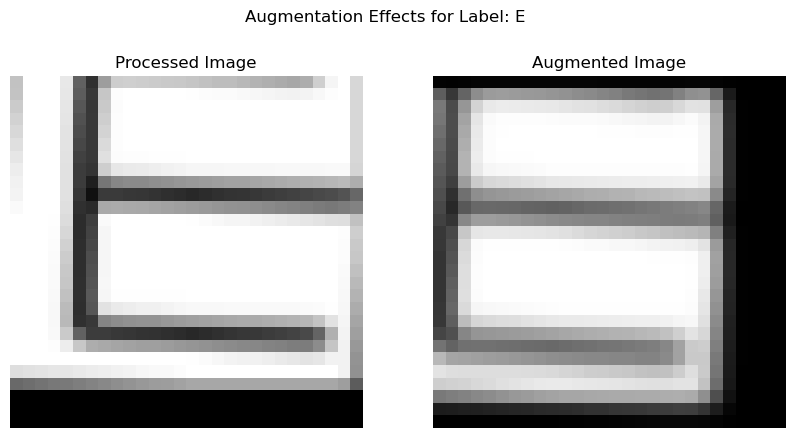

In [143]:
# Visualize augmentation effects for a sample label
visualize_augmentation_effects(aug_uppercase_dir, "E")

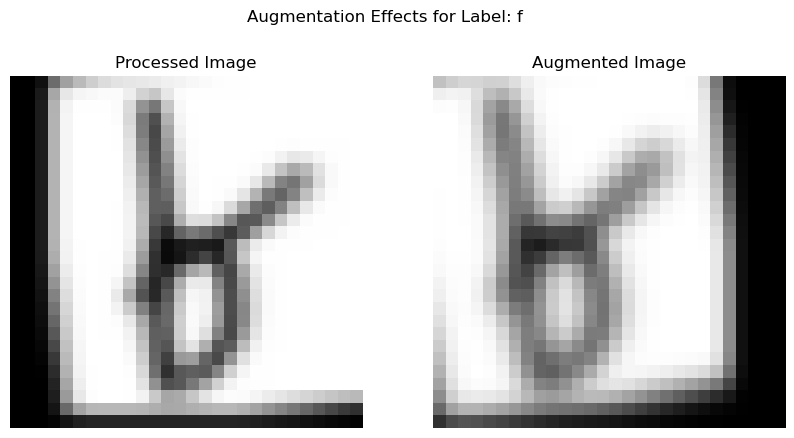

In [144]:
# Visualize augmentation effects for a sample label
visualize_augmentation_effects(aug_lowercase_dir, "f")

In [145]:
# Function to plot class distribution
def plot_class_distribution(data_dir, title):
    """
    Plots the distribution of images across labels.
    """
    label_counts = {}
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            label_counts[label] = len(os.listdir(label_dir))

    plt.figure(figsize=(12, 6))
    plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
    plt.xlabel("Labels")
    plt.ylabel("Number of Images")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

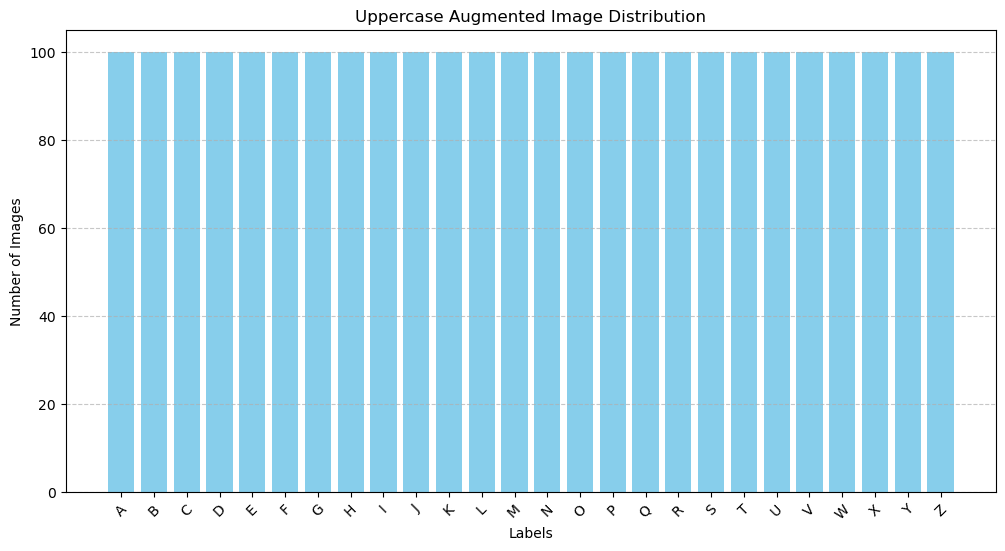

In [146]:
# Plot class distribution for uppercase and lowercase
plot_class_distribution(aug_uppercase_dir, "Uppercase Augmented Image Distribution")

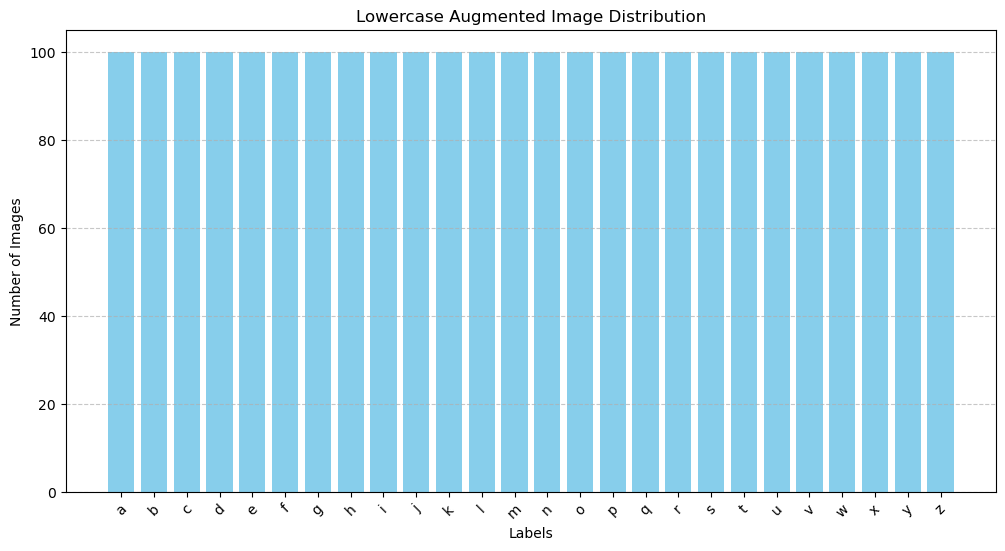

In [147]:
plot_class_distribution(aug_lowercase_dir, "Lowercase Augmented Image Distribution")

In [148]:
# Function to compute and plot mean and standard deviation of pixel intensities
def plot_pixel_statistics(data_dir, title):
    """
    Computes and plots the mean and standard deviation of pixel intensities for each label.
    """
    label_means = {}
    label_stds = {}
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            pixel_values = []
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                img = Image.open(img_path)
                img_array = np.array(img)
                pixel_values.extend(img_array.flatten())
            label_means[label] = np.mean(pixel_values)
            label_stds[label] = np.std(pixel_values)

    plt.figure(figsize=(12, 6))
    plt.bar(label_means.keys(), label_means.values(), color='blue', alpha=0.7, label='Mean')
    plt.bar(label_stds.keys(), label_stds.values(), color='red', alpha=0.7, label='Std Dev')
    plt.xlabel("Labels")
    plt.ylabel("Pixel Intensity")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

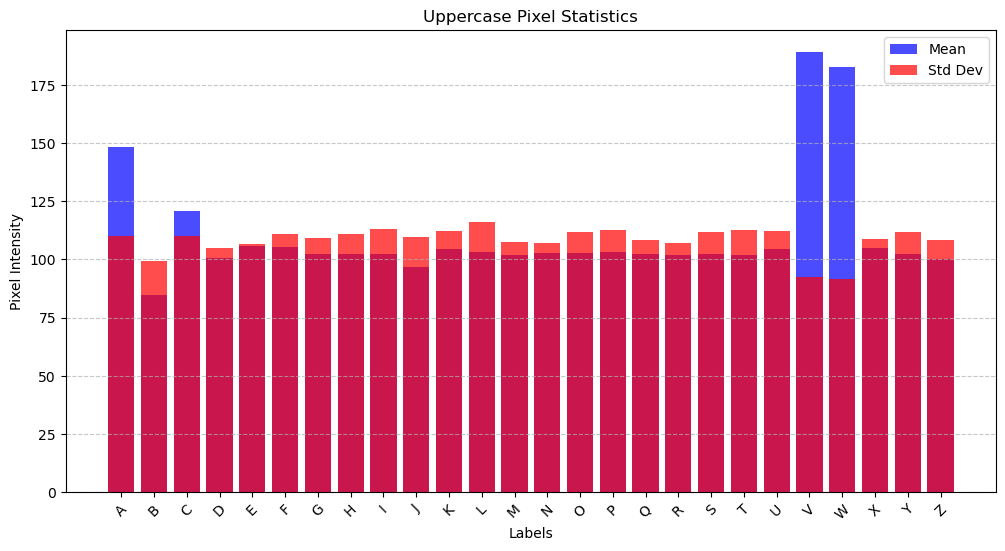

In [149]:
# Plot pixel statistics for uppercase and lowercase
plot_pixel_statistics(aug_uppercase_dir, "Uppercase Pixel Statistics")

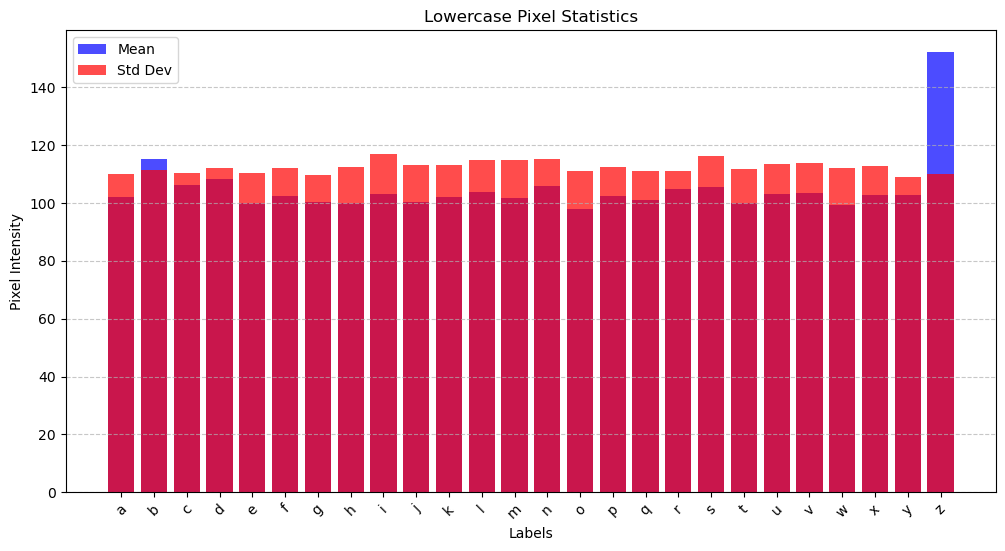

In [150]:
plot_pixel_statistics(aug_lowercase_dir, "Lowercase Pixel Statistics")

In [151]:
# Function to visualize t-SNE or PCA
def visualize_dimensionality_reduction(data_dir, title, method='tsne'):
    """
    Visualizes the high-dimensional image data in 2D using t-SNE or PCA.
    """
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                img = Image.open(img_path)
                img_array = np.array(img).flatten()
                images.append(img_array)
                labels.append(label)

    images = np.array(images)
    labels = np.array(labels)

    if method == 'tsne':
        tsne = TSNE(n_components=2, random_state=42)
        reduced_data = tsne.fit_transform(images)
    elif method == 'pca':
        pca = PCA(n_components=2)
        reduced_data = pca.fit_transform(images)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], cmap='tab20', alpha=0.7)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Labels")
    plt.show()

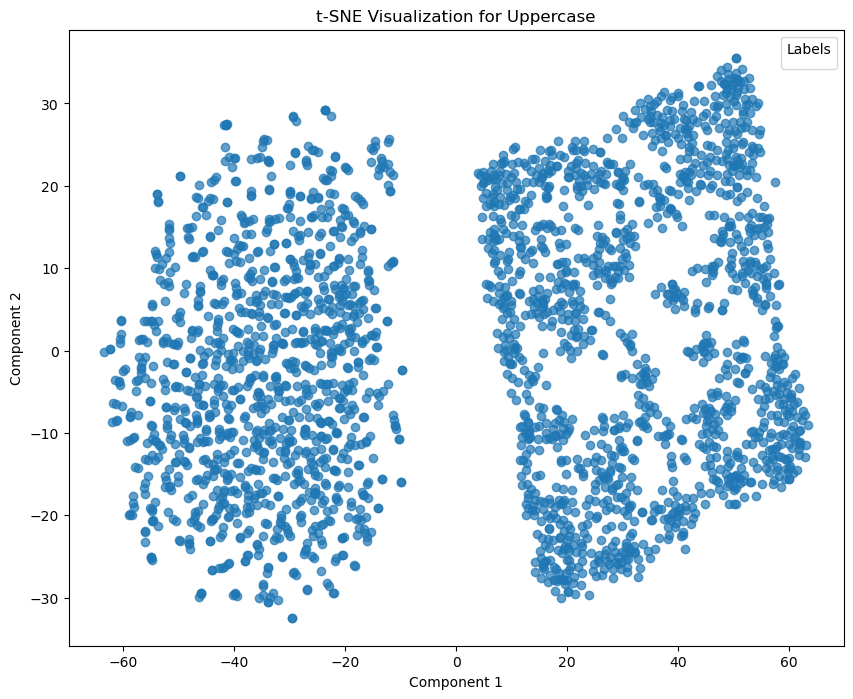

In [152]:
# Visualize t-SNE for uppercase and lowercase
visualize_dimensionality_reduction(aug_uppercase_dir, "t-SNE Visualization for Uppercase", method='tsne')

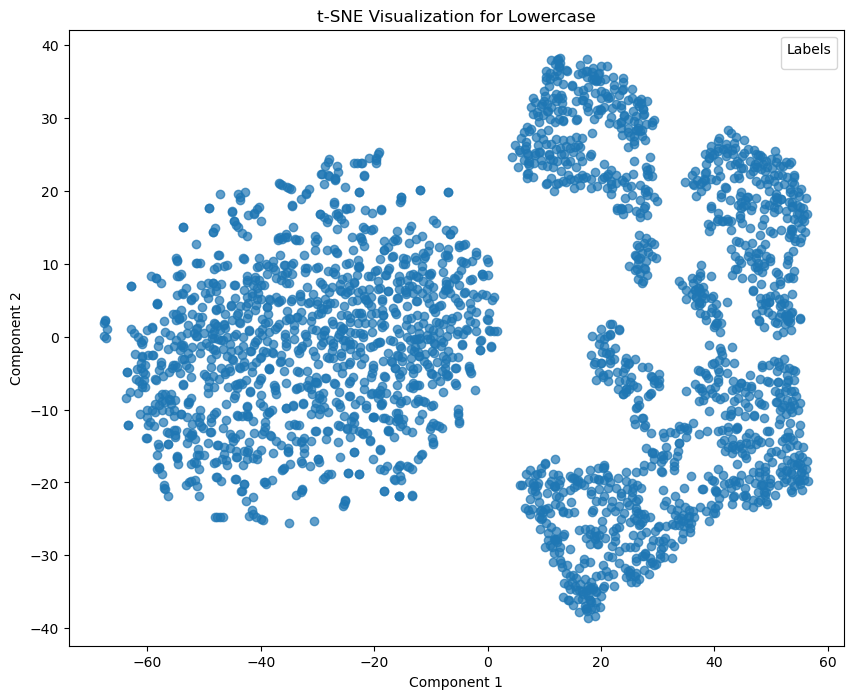

In [153]:
visualize_dimensionality_reduction(aug_lowercase_dir, "t-SNE Visualization for Lowercase", method='tsne')

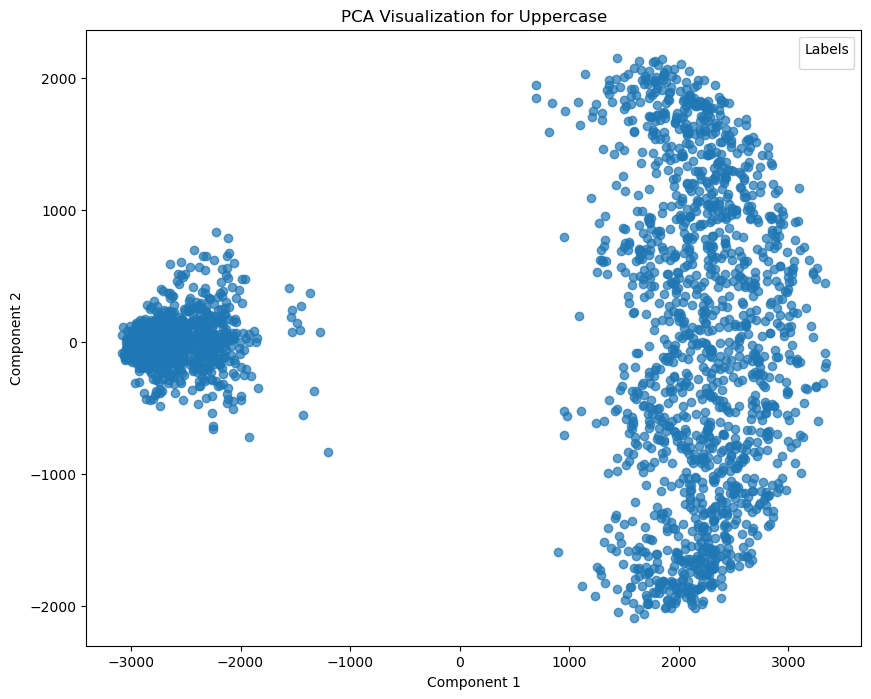

In [154]:
visualize_dimensionality_reduction(aug_uppercase_dir, "PCA Visualization for Uppercase", method='pca')

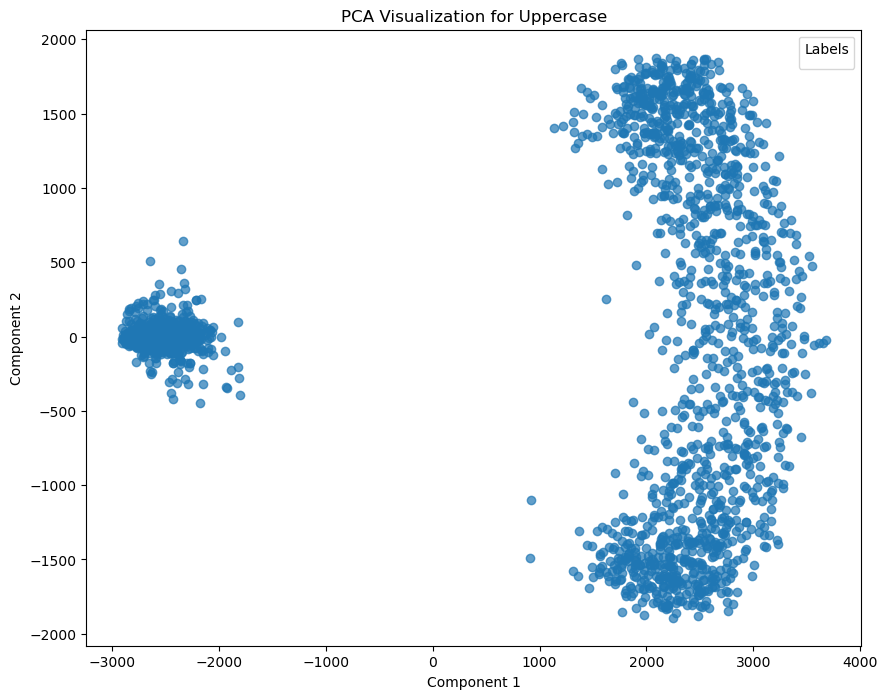

In [155]:
visualize_dimensionality_reduction(aug_lowercase_dir, "PCA Visualization for Uppercase", method='pca')

### ***6️⃣ Image splliting***

In [190]:
for split in ["train", "test", "val"]:
    for case in ["uppercase", "lowercase"]:
        char_range = "ABCDEFGHIJKLMNOPQRSTUVWXYZ" if case == "uppercase" else "abcdefghijklmnopqrstuvwxyz"
        for char in char_range:
            target_dir = os.path.join(split_dir, split, case, char)
            os.makedirs(target_dir, exist_ok=True)  # Create if it doesn't exist

            # Clear existing files (if any)
            for filename in os.listdir(target_dir):
                file_path = os.path.join(target_dir, filename)
                try:
                    if os.path.isfile(file_path):
                        os.remove(file_path)
                    elif os.path.isdir(file_path): # Handle subdirectories if any
                        shutil.rmtree(file_path)
                except Exception as e: # Catch potential errors and print them
                    print(f"Error deleting {file_path}: {e}")

In [192]:
# Function to load and limit images to 100 per label
def load_and_limit_images(data_dir, label, limit=100):
    """
    Loads images for a specific label and limits the number to a specified limit.
    """
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        images = [img for img in os.listdir(label_dir) if img.endswith(".png")]
        if len(images) > limit:
            images = random.sample(images, limit)
        return images
    return []

In [194]:
def split_and_copy_data(source_dir, dest_dir, split_ratio=(0.7, 0.15, 0.15)):
    for case in ["uppercase", "lowercase"]:
        char_range = "ABCDEFGHIJKLMNOPQRSTUVWXYZ" if case == "uppercase" else "abcdefghijklmnopqrstuvwxyz"
        for char in tqdm(char_range, desc=f"Splitting {case}"):
            images = load_and_limit_images(source_dir if case == "uppercase" else source_dir.replace("UPPER","lower"), char) # Dynamic source dir
            if not images: # Skip if no images are found for the character.
                continue
            random.shuffle(images)

            train_len = int(len(images) * split_ratio[0])
            val_len = int(len(images) * split_ratio[1])

            train_images = images[:train_len]
            val_images = images[train_len:train_len + val_len]
            test_images = images[train_len + val_len:]

            for split, image_list in [("train", train_images), ("val", val_images), ("test", test_images)]:
                target_dir = os.path.join(dest_dir, split, case, char)
                for image_name in tqdm(image_list, desc=f"Copying {split} images for {char}", leave=False):
                    source_path = os.path.join(source_dir if case == "uppercase" else source_dir.replace("UPPER","lower"), char, image_name)
                    target_path = os.path.join(target_dir, image_name)
                    shutil.copy(source_path, target_path)

In [196]:
# Example usage (T-2 split):
split_and_copy_data(aug_uppercase_dir, split_dir)

Copying train images for A:  51%|███████████████████████████▎                         | 36/70 [00:00<00:00, 193.78it/s]
                                                                                                                       
Copying val images for A:   0%|                                                                 | 0/15 [00:00<?, ?it/s]
                                                                                                                       
Copying train images for B:   0%|                                                               | 0/70 [00:00<?, ?it/s]
                                                                                                                       
Copying val images for B:   0%|                                                                 | 0/15 [00:00<?, ?it/s]
                                                                                                                       
Copying train images for C:   0%|       